# Postprocessing

Section 1 - Import code and make definitions

Section 2 - running and viewing the observations

Section 3 - LPSC 2023 - observations

Section 4 - Singapore 2023 - observations

## Section 1 - Import code and make definitions

### Before running for the first time you will need to execute Code Block 1 in TauP_plots.ipynb

### The simulations are stored at the Zenodo repository https://doi.org/10.5281/zenodo.10631693 

### You will need to extract the simulations and store them in top_dir
### e.g. if you have a folder called 128b_VPREMOON_atten_surface_2 and it is in /Users/cnunn/lunar_data/axisem3d_runs/ then the top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'

In [50]:
# top level dir 

######## 
# Extract the AxiSEM3D runs to a directory and set the top directory HERE 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

In [18]:
# %matplotlib notebook
%matplotlib inline

# calculate the taup models
from obspy.taup import TauPyModel
import time

calculated_VPREMOON = TauPyModel(model='VPREMOON_taup')
calculated_ISSI_M1 = TauPyModel(model='ISSI_MOON_M1_taup')
calculated_VPREMOON_atten_no_LVZ_taup = TauPyModel(model='VPREMOON_atten_no_LVZ_taup')

calculated_taup_dict =	{
  "VPREMOON_taup": calculated_VPREMOON,
  "ISSI_MOON_M1_taup": calculated_ISSI_M1,
    'VPREMOON_atten_no_LVZ_taup':calculated_VPREMOON_atten_no_LVZ_taup
}

from obspy.core import Stream, UTCDateTime
from obspy import read_inventory

from postprocessing_util_observations import get_observations_local
from postprocessing_util import get_all_streams_from_netcdf
from postprocessing_util import plot_epicentral_distance_taup
from postprocessing_util import plot_envelope_taup

phase_list_ISSI = ["P", "PP", "PS", "PSS", "2.15kmps","0.57kmps"]
phase_list_VPREMOON_layered = [
    "P",
    "PS",
    "2.47kmps",
    "0.77kmps",
    "0.47kmps"
]

phase_list_VPREMOON_layered_no_LVZ = [
    "P",
    "PS",
    "2.27kmps",
    "1.66kmps",
    "1.21kmps"
]




distance_examples={
    2:2.167025997371414,
    5:5.075044339909034,
    25:25.432357813795228,
    28:28.047339965833054,
    34:34.560784470873635,
    57:57.67071530277473
}
    
    
# epicentral distances of the events used     
# A13/S-IVB 4.480908613215989
# A14/S-IVB 5.783787517596895
# A15/S-IVB 11.718510058287118
# A15/S-IVB 6.118664372615061
# A16/S-IVB 5.075044339909034
# A16/S-IVB 9.054122437295218
# A16/S-IVB 36.37690556827287
# A17/S-IVB 11.13215379702135
# A17/S-IVB 5.161473408558756
# A17/S-IVB 34.01814904542429
# A17/S-IVB 28.047339965833054
# A12/LM 2.4252731172780972
# A14/LM 3.8036577155384563
# A14/LM 2.167025997371414
# A15/LM 37.23510859020209
# A15/LM 34.560784470873635
# A15/LM 3.0396554713670882
# A17/LM 57.67071530277473
# A17/LM 52.68194068762792
# A17/LM 25.432357813795228
# A17/LM 32.48706382198207


In [2]:
# location of the data 

catalogs=['files/Nunn_2024_artificial_impacts_picks.xml']

inv = read_inventory('./local_MSEED/inventory.xml')

In [3]:
# get the observations (this includes using VPREMOON_taup to mark the P and S arrivals)
original_observation_stream_local_MH = get_observations_local(channel='MH*',model_taup=calculated_taup_dict['VPREMOON_taup'],catalog=catalogs[0],inv=inv)

A13/S-IVB 4.480908613215994
A14/S-IVB 5.783787517596895
A15/S-IVB 11.718510058287118
A15/S-IVB 6.118664372615061
A16/S-IVB 5.075044339909034
A16/S-IVB 9.054122437295216
A16/S-IVB 36.376905568272875
A17/S-IVB 11.132153797021344
A17/S-IVB 5.1614734085587495
A17/S-IVB 34.01814904542429
A17/S-IVB 28.047339965833054
A12/LM 2.4252731172780986
A14/LM 3.8036577155384514
A14/LM 2.1670259973714154
A15/LM 37.235108590202096
A15/LM 34.560784470873635
A15/LM 3.0396554713670896
A17/LM 57.670715302774745
A17/LM 52.681940687627936
A17/LM 25.432357813795228
A17/LM 32.48706382198207


## Section 3 - Examples 

In [6]:
original_stream_dict = {}
original_stream_obs_dict = {}

############################################################################
#VPREMOON
############################################################################

############################################################################
# specify a run name
run = '120_VPREMOON_atten_explosion_2'
run_title = "VPREMOON, with attenuation, surface explosion"
short_title = "VPREMOON  V-0"
# model for TauP
model_taup='VPREMOON_taup'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################

# specify a run name
run = '128b_VPREMOON_atten_surface_2'
run_title = "VPREMOON, 4% surface topography, surface explosion"
short_title = 'VPREMOON, 4% surface topography  V-1'
# model for TauP
model_taup='VPREMOON_taup'
# failed with a memory issue - use first 1700 s. 

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
for tr in original_stream_run:
    tr.trim(endtime=UTCDateTime(1700))
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '125_VPREMOON_atten_Moho_2'
run_title = "VPREMOON, Moho topography from Wieczorek et al., 2013, surface explosion"
short_title = "VPREMOON, Moho topography  V-2" 
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '127_VPREMOON_atten_linear20_2'
run_title = "VPREMOON, ±50% scatter linear from 0 to 20 km, surface explosion"
short_title = "VPREMOON, ±50% scatter (linear from 0-20 km)  V-3"
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run


############################################################################
# specify a run name
run = '126_VPREMOON_atten_linear50_2'
run_title = "VPREMOON, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "VPREMOON, ±50% scatter (linear from 0-50 km)  V-4"
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '124_VPREMOON_atten_linear80_2'
run_title = "VPREMOON, ±50% scatter linear from 0 to 80 km, surface explosion"
short_title = "VPREMOON, ±50% scatter (linear from 0-80 km)  V-5"
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '152_VPREMOON_atten_combi_50_2'
run_title = "VPREMOON, 4% surface topopgraphy, 100% Moho topography, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = 'VPREMOON, combination  V-6'
# model for TauP
model_taup='VPREMOON_taup'
# unstable after 2900 s 

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
for tr in original_stream_run:
    tr.trim(endtime=UTCDateTime(2900))
original_stream_dict[run] =  original_stream_run


############################################################################
#ISSI M1
############################################################################

############################################################################
# specify a run name
run = '141_ISSI_atten_explosion_2'
run_title = "ISSI M1, with attenuation, surface explosion"
short_title = "M1  M-0"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################

# specify a run name
run = '148_ISSI_atten_surface_2'
run_title = "ISSI M1, surface topography, surface explosion"
short_title = "M1, 4% surface topography  M-1"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '147_ISSI_atten_Moho_2'
run_title = "ISSI M1, 20% Moho topography, surface explosion"
short_title = "M1, 20% Moho topography  M-2"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '146_ISSI_atten_linear20_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 20 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-20 km)  M-3"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '145_ISSI_atten_linear50_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-50 km)  M-4"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run


############################################################################
# specify a run name
run = '140_ISSI_atten_linear80_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 80 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-80 km)  M-5"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '150_ISSI_atten_combi_50_2'
run_title = "ISSI M1, surface topography, 20% Moho topography, ±50% scatter linear from 0 to 20 km, surface explosion"
short_title = "M1, combination  M-6"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
#VPREMOON (NO LVZ)
############################################################################

############################################################################


# specify a run name
run = '135_VPREMOON_atten_no_LVZ_2'
short_title = "VPREMOON (no LVZ)"
run_title = "VPREMOON without LVZ, surface explosion"
short_title = ''
# model for TauP
model_taup='VPREMOON_atten_no_LVZ_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
print('Models read in')



Min/Max R -1.7682369 2.3789287
Min/Max Z -2.966478 11542.449
Min/Max R -616380400000000.0 442794320000000.0
Min/Max T -192019500000000.0 270256340000000.0
Min/Max Z -17943070000000.0 26106646000000.0
Min/Max R -61.83381 54.106308
Min/Max T -77.53625 86.93062
Min/Max Z -2.7161646 14910.24
Min/Max R -1736.6824 0.774188
Min/Max T -51.84051 47.351578
Min/Max Z -1.1977369 14481.193
Min/Max R -1312.83 74.45259
Min/Max T -48.574 49.78798
Min/Max Z -0.6467408 13735.931
Min/Max R -0.21200056 1302.2299
Min/Max T -36.682728 34.698334
Min/Max Z -0.31479573 11450.062
Min/Max R -4040445700000.0 19840990000000.0
Min/Max T -106992435000.0 29037037000000.0
Min/Max Z -3022871000.0 6064154000000.0
Min/Max R -0.021632634 0.023049988
Min/Max Z -0.103238925 30.885838
Min/Max R -0.34949896 0.2848416
Min/Max T -0.22458754 0.3936547
Min/Max Z -0.094144166 30.759514
Min/Max R -0.023477364 0.023037096
Min/Max T -0.006141169 0.0053621563
Min/Max Z -0.09764428 31.930235
Min/Max R -2.4572663 1.476466
Min/Max T -0.1

30
Z
30 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples
...
(28 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872786994
L4 121.27245774557402
L8 242.54491549114798
L12 363.81737323672195
L16 485.08983098229595
L20 606.36228872787
L24 727.634746473444
L28 848.907204219018
L32 970.1796619645919
L36 1091.452119710166
L40 1212.72457745574
L44 1333.9970352013138
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.814408438036
event_depth=0
CURRENT RUN: 120_VPREMOON_atten_explosion_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-02-15T22:09:31.719279Z.png


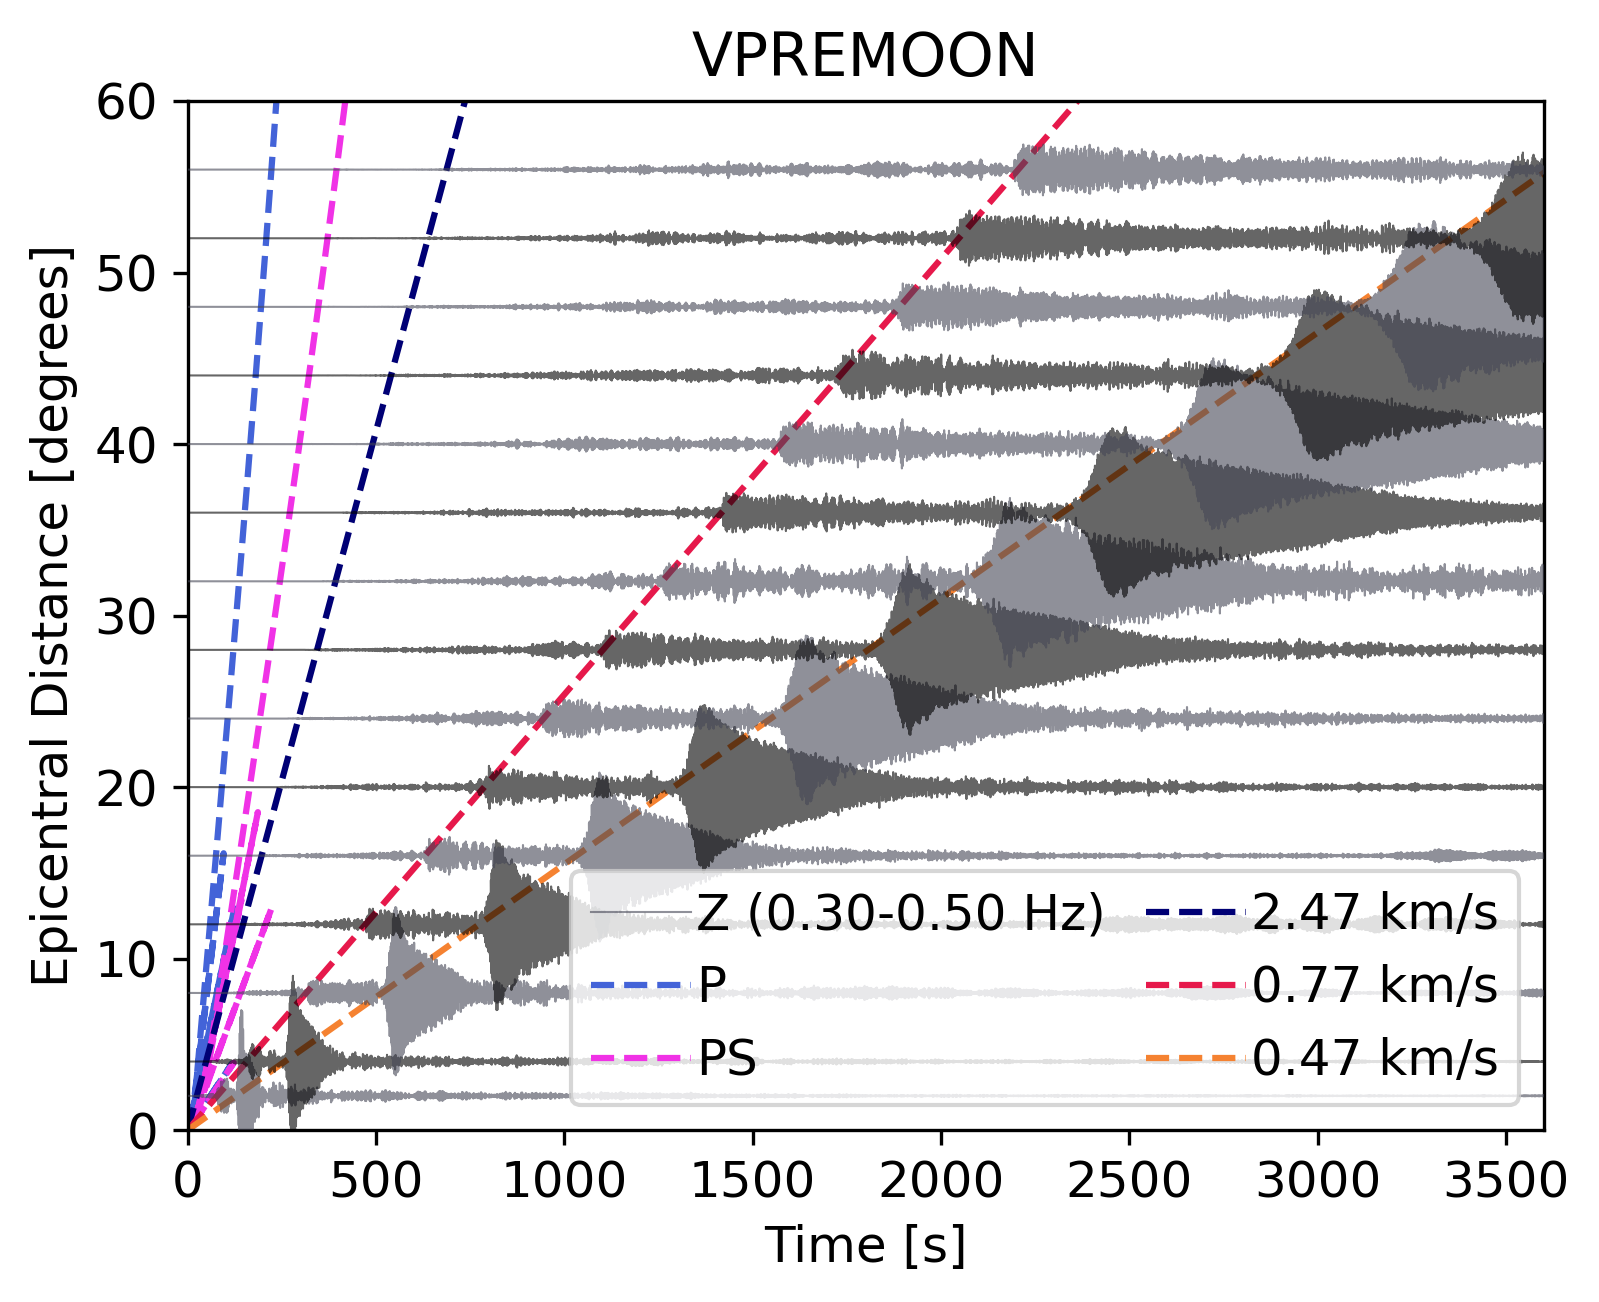

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L4..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L8..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L12..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L16..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L20..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L24..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L28..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L32..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L36..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L40..Z | 1970-01-01T00:00:00.06760

In [7]:
# Figure 4(right) - Simulations - 120_VPREMOON_atten_explosion_2

# specify a run name
run = '120_VPREMOON_atten_explosion_2'
short_title = 'VPREMOON'
run_title = "VPREMOON, with attenuation, surface explosion"
# model for TauP
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,0.3
             ]




plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=5,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=phase_list_VPREMOON_layered, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',
                             )

30
Z
30 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples
...
(28 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872786994
L4 121.27245774557402
L8 242.54491549114798
L12 363.81737323672195
L16 485.08983098229595
L20 606.36228872787
L24 727.634746473444
L28 848.907204219018
L32 970.1796619645919
L36 1091.452119710166
L40 1212.72457745574
L44 1333.9970352013138
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.814408438036
event_depth=0
CURRENT RUN: 120_VPREMOON_atten_explosion_2
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-02-15T22:09:50.000631Z.png


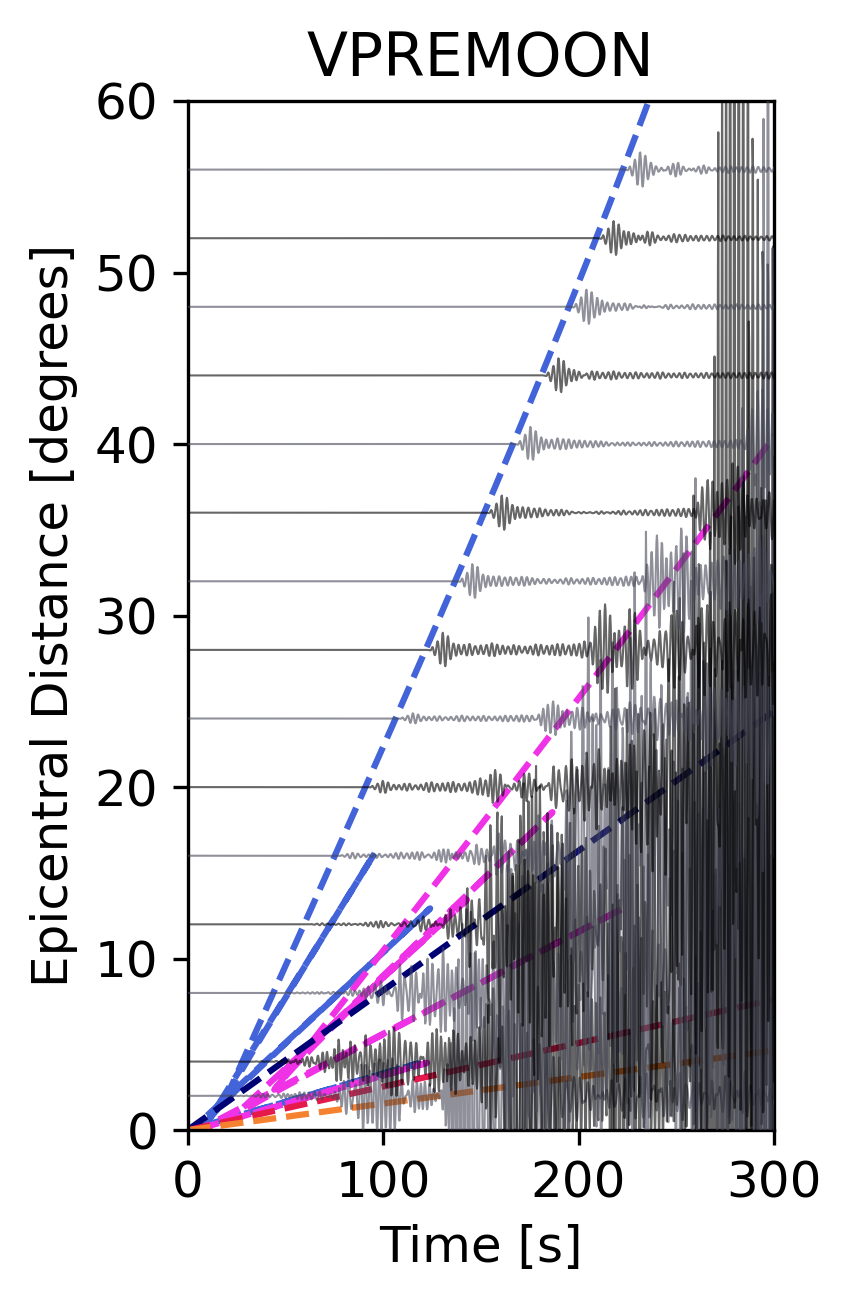

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L4..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L8..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L12..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L16..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L20..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L24..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L28..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L32..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L36..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L40..Z | 1970-01-01T00:00:00.067600Z - 1970-

In [9]:
# Figure 4(left) - Simulations - close up - 120_VPREMOON_atten_explosion_2

# specify a run name
run = '120_VPREMOON_atten_explosion_2'
short_title = 'VPREMOON'
run_title = "VPREMOON, with attenuation, surface explosion"
# model for TauP
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        2,2,2,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=300,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='PP_arrival', phase_list=phase_list_VPREMOON_layered, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=False,
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872786994
L4 121.27245774557402
L8 242.54491549114798
L12 363.81737323672195
L16 485.08983098229595
L20 606.36228872787
L24 727.634746473444
L28 848.907204219018
L32 970.1796619645919
L36 1091.452119710166
L40 1212.72457745574
L44 1333.9970352013138
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.814408438036
event_depth=0
CURRENT RUN: 135_VPREMOON_atten_no_LVZ_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-02-17T21:19:59.894540Z.png


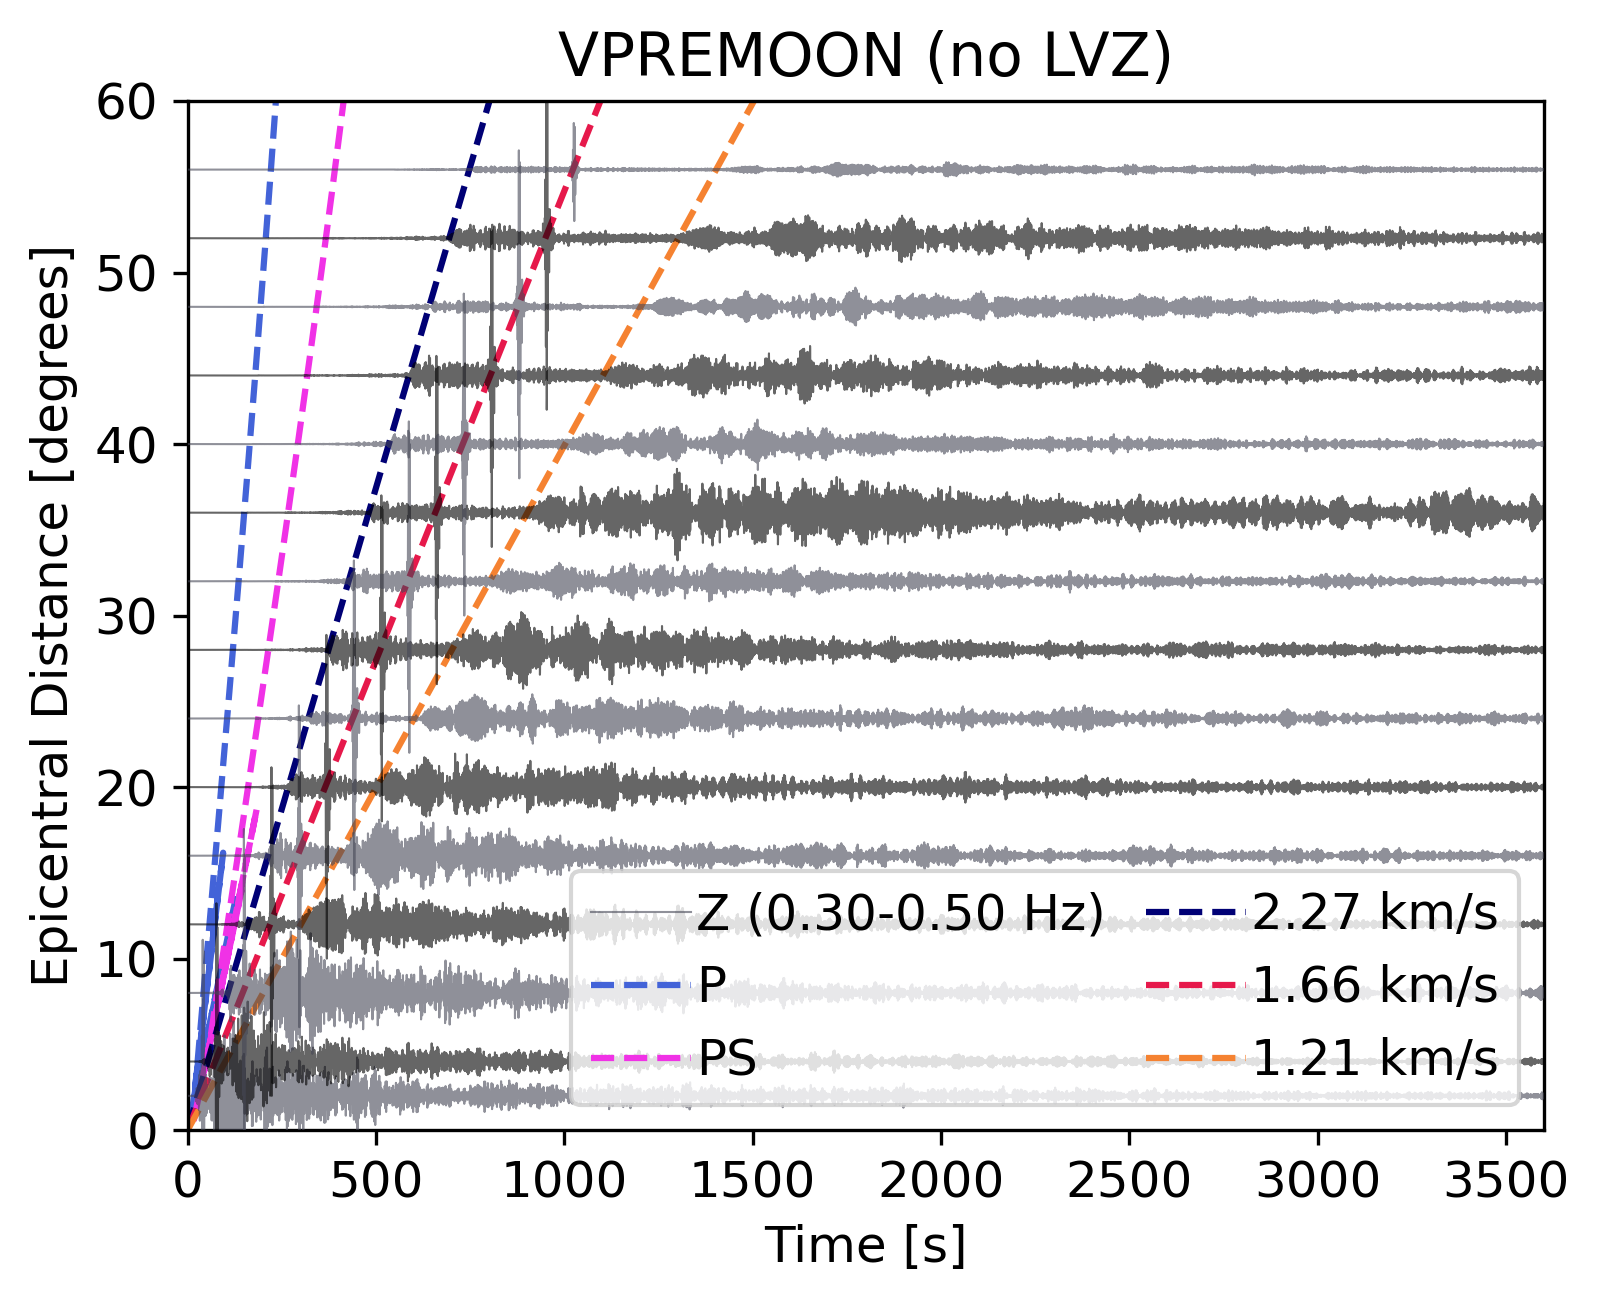

15 Trace(s) in Stream:
LO.L2..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L4..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L8..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L12..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L16..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L20..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L24..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L28..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L32..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L36..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L40..Z | 1969-12-31T23:59:59.97957

In [48]:
# Figure 5(right) - Simulations - 135_VPREMOON_atten_no_LVZ_2

# specify a run name
run = '135_VPREMOON_atten_no_LVZ_2'
short_title = "VPREMOON (no LVZ)"
run_title = "VPREMOON without LVZ, surface explosion"
# model for TauP
model_taup='VPREMOON_atten_no_LVZ_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=10,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=phase_list_VPREMOON_layered_no_LVZ, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872786994
L4 121.27245774557402
L8 242.54491549114798
L12 363.81737323672195
L16 485.08983098229595
L20 606.36228872787
L24 727.634746473444
L28 848.907204219018
L32 970.1796619645919
L36 1091.452119710166
L40 1212.72457745574
L44 1333.9970352013138
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.814408438036
event_depth=0
CURRENT RUN: 135_VPREMOON_atten_no_LVZ_2
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-02-17T21:26:51.146759Z.png


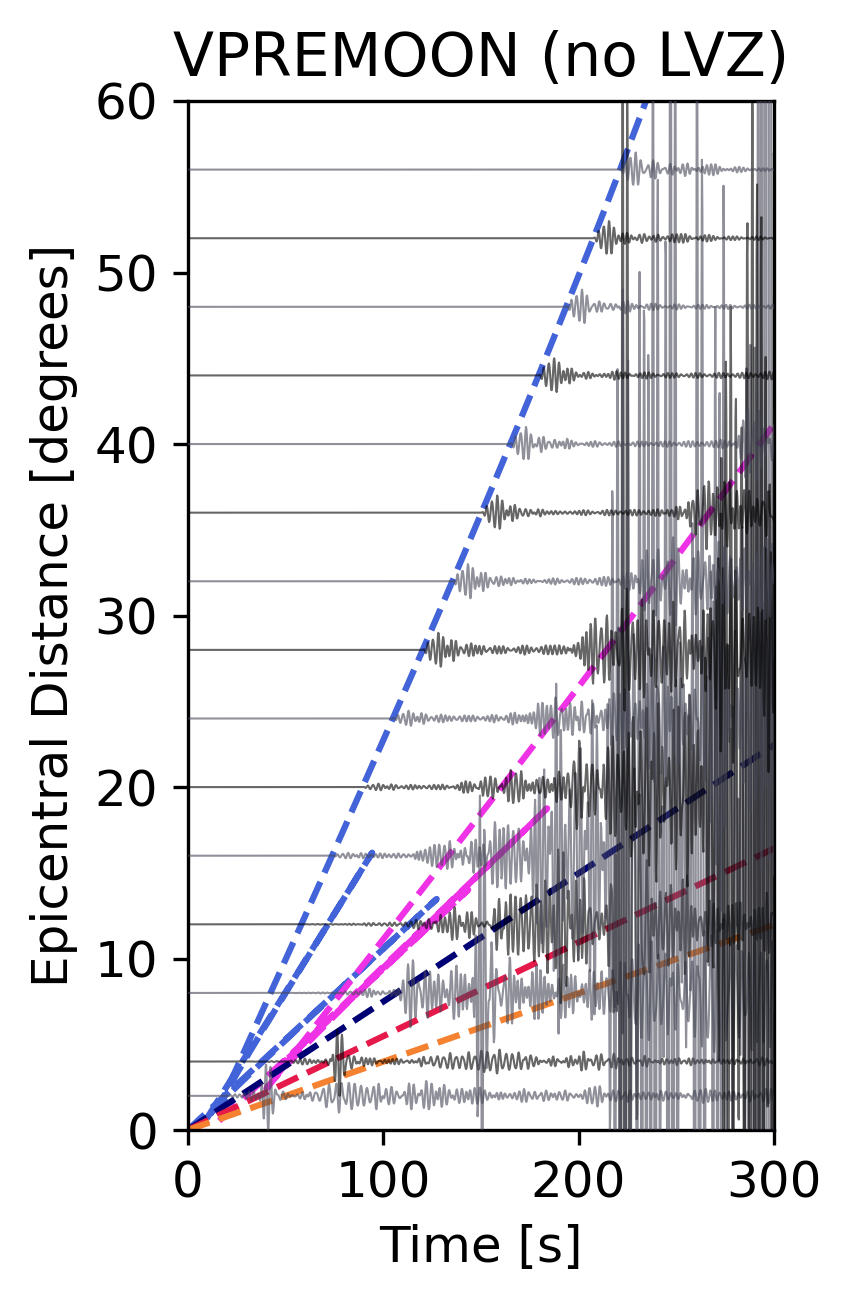

15 Trace(s) in Stream:
LO.L2..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L4..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L8..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L12..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L16..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L20..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L24..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L28..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L32..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L36..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L40..Z | 1969-12-31T23:59:59.979570Z - 1970-

In [49]:
# Figure 5(left) - Simulations - close up - 135_VPREMOON_atten_no_LVZ_2

# specify a run name
run = '135_VPREMOON_atten_no_LVZ_2'
short_title = "VPREMOON (no LVZ)"
run_title = "VPREMOON without LVZ, surface explosion"
# model for TauP
model_taup='VPREMOON_atten_no_LVZ_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        2,2,2,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=300,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='PP_arrival', phase_list=phase_list_VPREMOON_layered_no_LVZ, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=False,
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872786994
L4 121.27245774557402
L8 242.54491549114798
L12 363.81737323672195
L16 485.08983098229595
L20 606.36228872787
L24 727.634746473444
L28 848.907204219018
L32 970.1796619645919
L36 1091.452119710166
L40 1212.72457745574
L44 1333.9970352013138
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.814408438036
event_depth=0
CURRENT RUN: 148_ISSI_atten_surface_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-02-15T22:10:32.713351Z.png


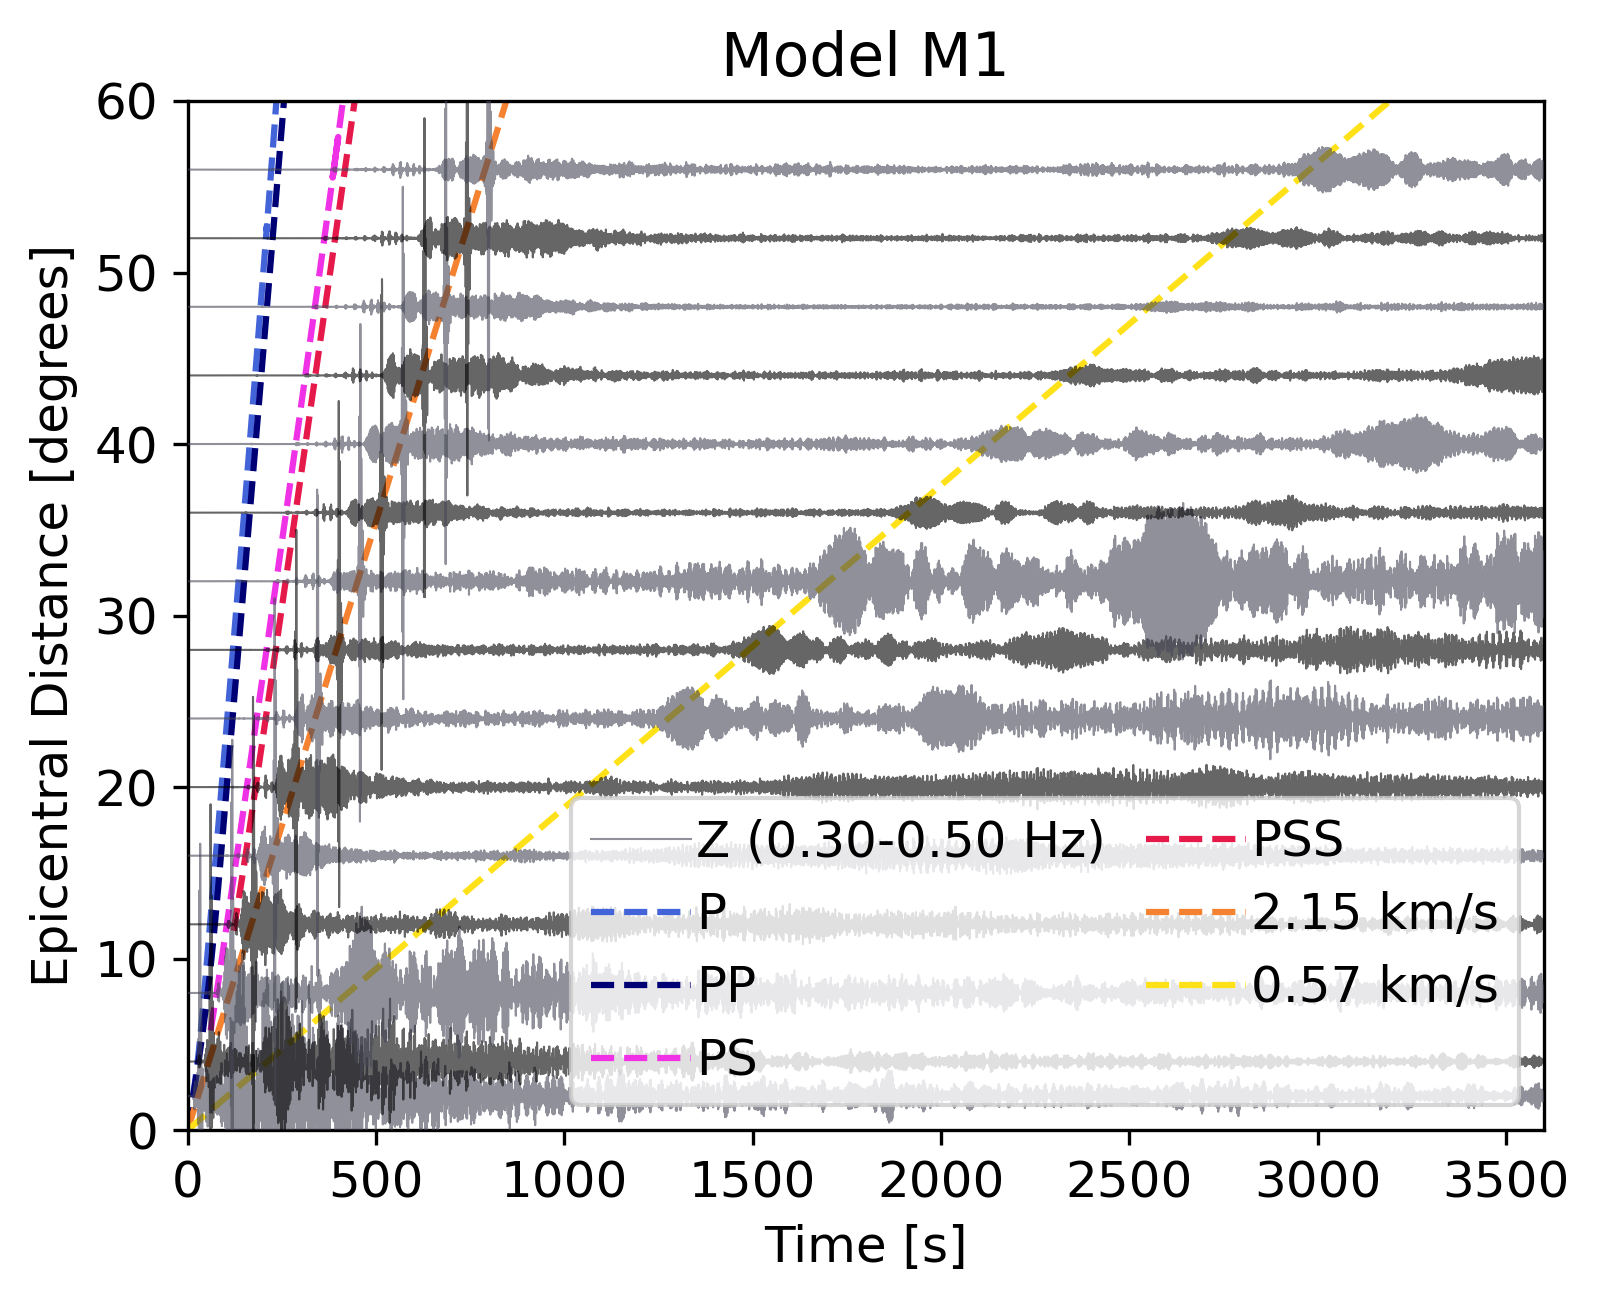

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L40..Z | 1970-01-01T00:00:00.09400

In [14]:
# Figure 6(right) - Simulations - 148_ISSI_atten_surface_2

############################################################################
# specify a run name
run = '148_ISSI_atten_surface_2'
short_title = "Model M1"
run_title = "ISSI M1, surface topography, surface explosion"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1.2
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=15,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=phase_list_ISSI, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872786994
L4 121.27245774557402
L8 242.54491549114798
L12 363.81737323672195
L16 485.08983098229595
L20 606.36228872787
L24 727.634746473444
L28 848.907204219018
L32 970.1796619645919
L36 1091.452119710166
L40 1212.72457745574
L44 1333.9970352013138
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.814408438036
event_depth=0
CURRENT RUN: 148_ISSI_atten_surface_2
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-02-15T22:10:42.535462Z.png


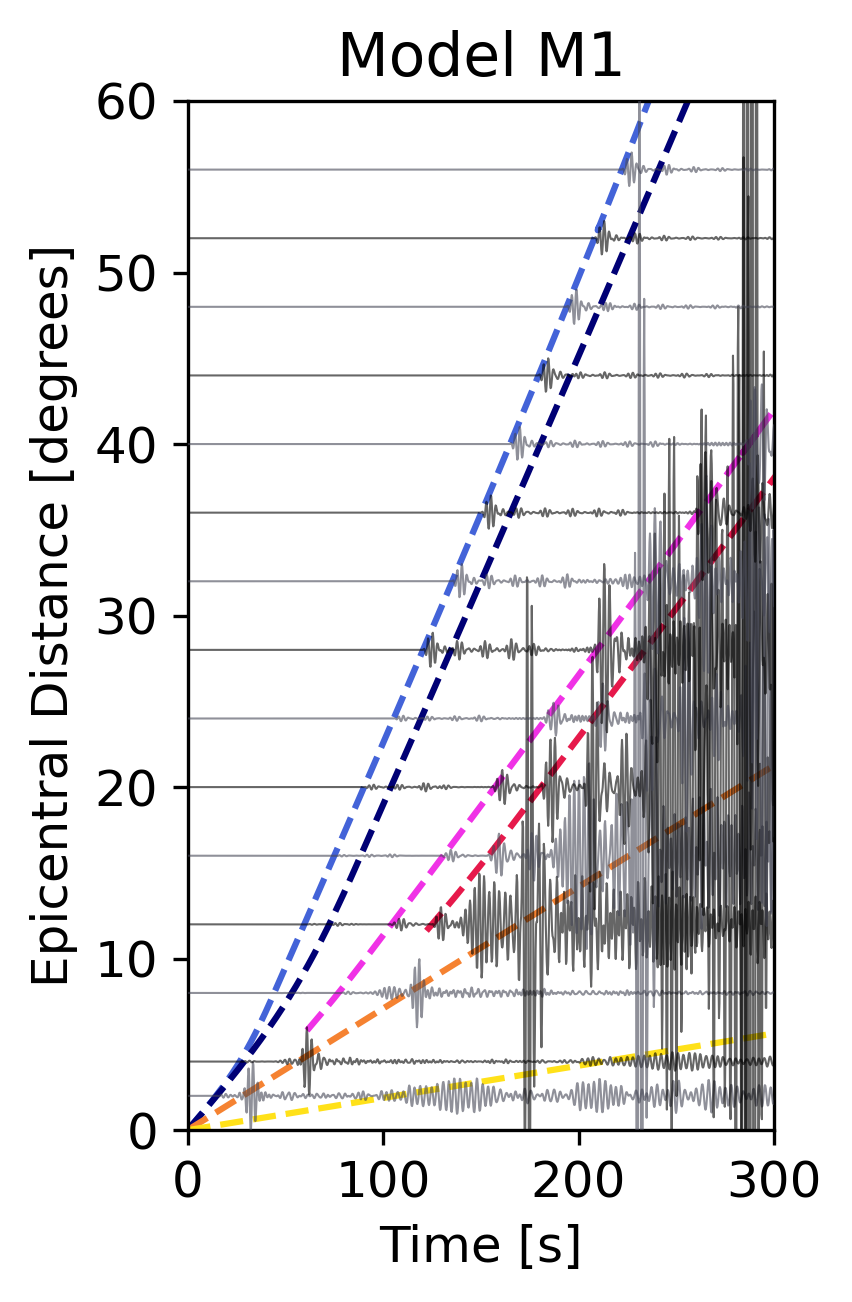

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L40..Z | 1970-01-01T00:00:00.094000Z - 1970-

In [15]:
# Figure 6(left) - Simulations - close up - 148_ISSI_atten_surface_2

# specify a run name
run = '148_ISSI_atten_surface_2'
short_title = "Model M1"
run_title = "ISSI M1, surface topography, surface explosion"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        2,2,2,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=300,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='PP_arrival', phase_list=phase_list_ISSI, raw=False, 
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=False,
                             )

Z
0 Trace(s) in Stream:

event_depth=0
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-02-15T22:10:47.356420Z.png


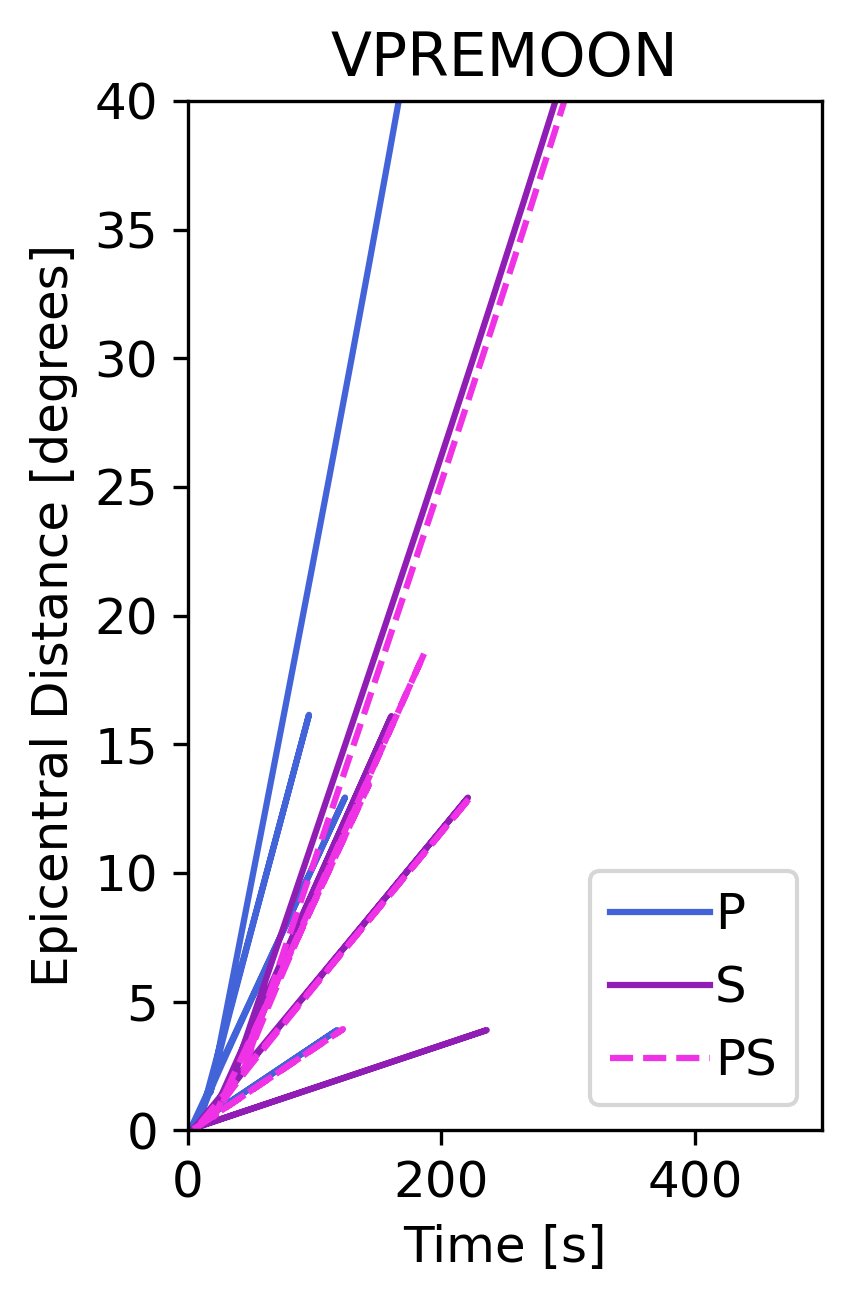

Z
0 Trace(s) in Stream:

event_depth=0
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-02-15T22:10:47.705799Z.png


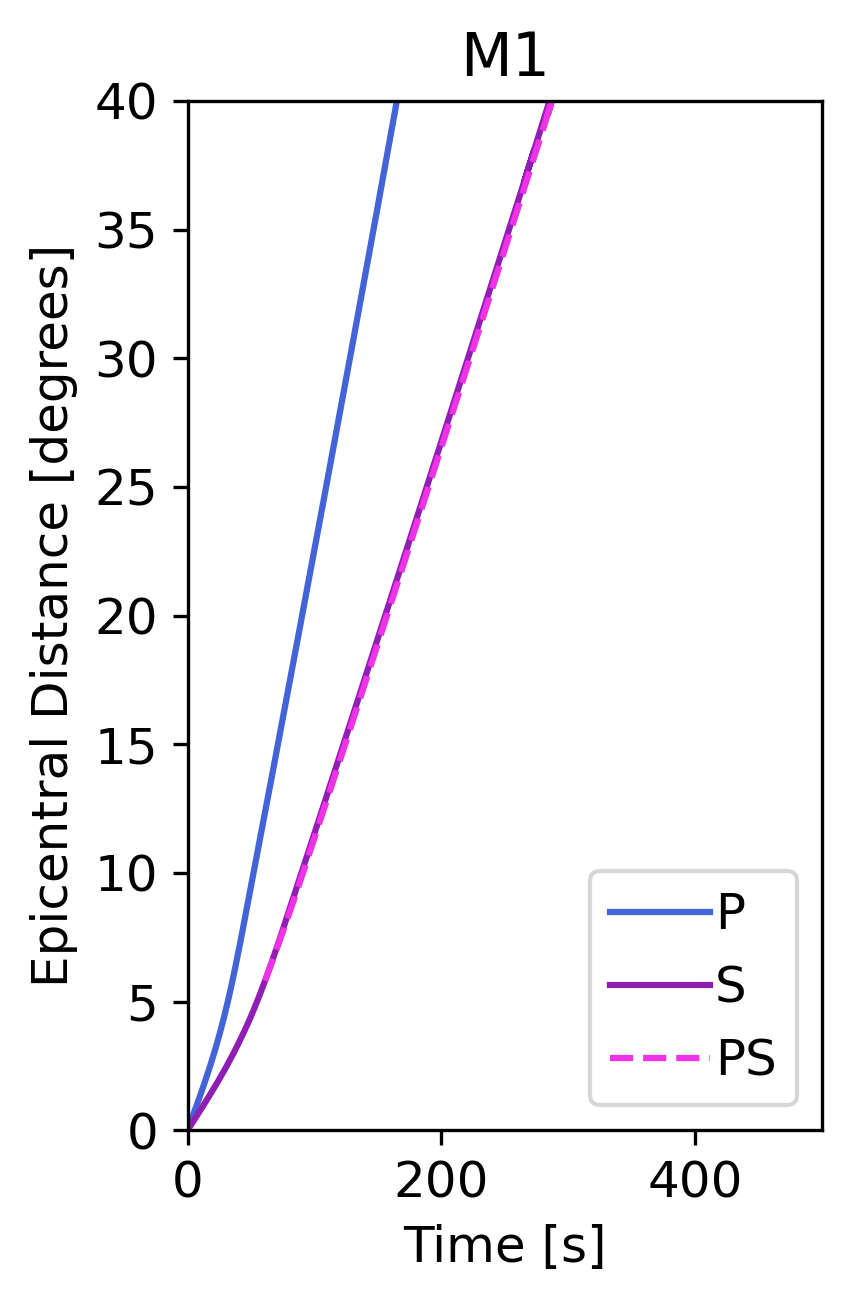

0 Trace(s) in Stream:


In [16]:
# Figure 7 - Seismic phases calculated using TauP

# specify a run name
run = '120_VPREMOON_atten_explosion_2'
short_title = 'VPREMOON'
run_title = "VPREMOON, with attenuation, surface explosion"
# model for TauP
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

plot_epicentral_distance_taup(original_stream=Stream(),inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict['VPREMOON_taup'],
                                                            just_taup=True, 
                         title='VPREMOON',freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=None,taup_height=0.25,
                         startsecond=0, endsecond=500,observations=False, channel='Z', degree_min=0, 
                              degree_max=40, normalize='PP_arrival', phase_list=["P","S","PS"], raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=True,legend_loc='lower right',ncol=1
                             )


plot_epicentral_distance_taup(original_stream=Stream(),inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],
                              just_taup=True, 
                         title='M1',freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=None,taup_height=0.25,
                         startsecond=0, endsecond=500,observations=False, channel='Z', degree_min=0, 
                              degree_max=40, normalize='PP_arrival', phase_list=["P","S","PS"], raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=True,legend_loc='lower right',ncol=1
                             )

In [47]:
# I used this to adjust the magnifcation factors in figures 9,10,11,12

# formula to get the new scale factor 
# target_ampl_factor = 10 
# current_ampl_factor = 9.6
# current_scale = 4.6
# new_scale = target_ampl_factor/current_ampl_factor*current_scale
# print(new_scale)

current_scale = 5.0125
current_ampl_factor = 254.8
target_ampl_factor = 200
new_scale = target_ampl_factor/current_ampl_factor*current_scale
print('{:.04f}'.format(new_scale))

3.9345


Calculated using model :  Model M1
Observations: smooth_periods=10, smooth_kernel_size=166 smoothing length=25.1 s
0 0.0019199723515543408
plot envelope  1.0
Simulation: 120_VPREMOON_atten_explosion_2, smooth_periods=10, smooth_kernel_size=103 smoothing length=25.1 s
1 0.00191725658430737
plot envelope  1.0
Simulation: 128b_VPREMOON_atten_surface_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
2 0.0019782668593302287
plot envelope  1.0
Simulation: 125_VPREMOON_atten_Moho_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
3 0.0006394752753136611
plot envelope  1.0
Simulation: 127_VPREMOON_atten_linear20_2, smooth_periods=10, smooth_kernel_size=101 smoothing length=24.6 s
4 0.0006403418449896616
plot envelope  1.0
Simulation: 126_VPREMOON_atten_linear50_2, smooth_periods=10, smooth_kernel_size=104 smoothing length=25.3 s
5 0.0006404398502641701
plot envelope  1.0
Simulation: 124_VPREMOON_atten_linear80_2, smooth_periods=10, smooth_kernel_size=104 sm

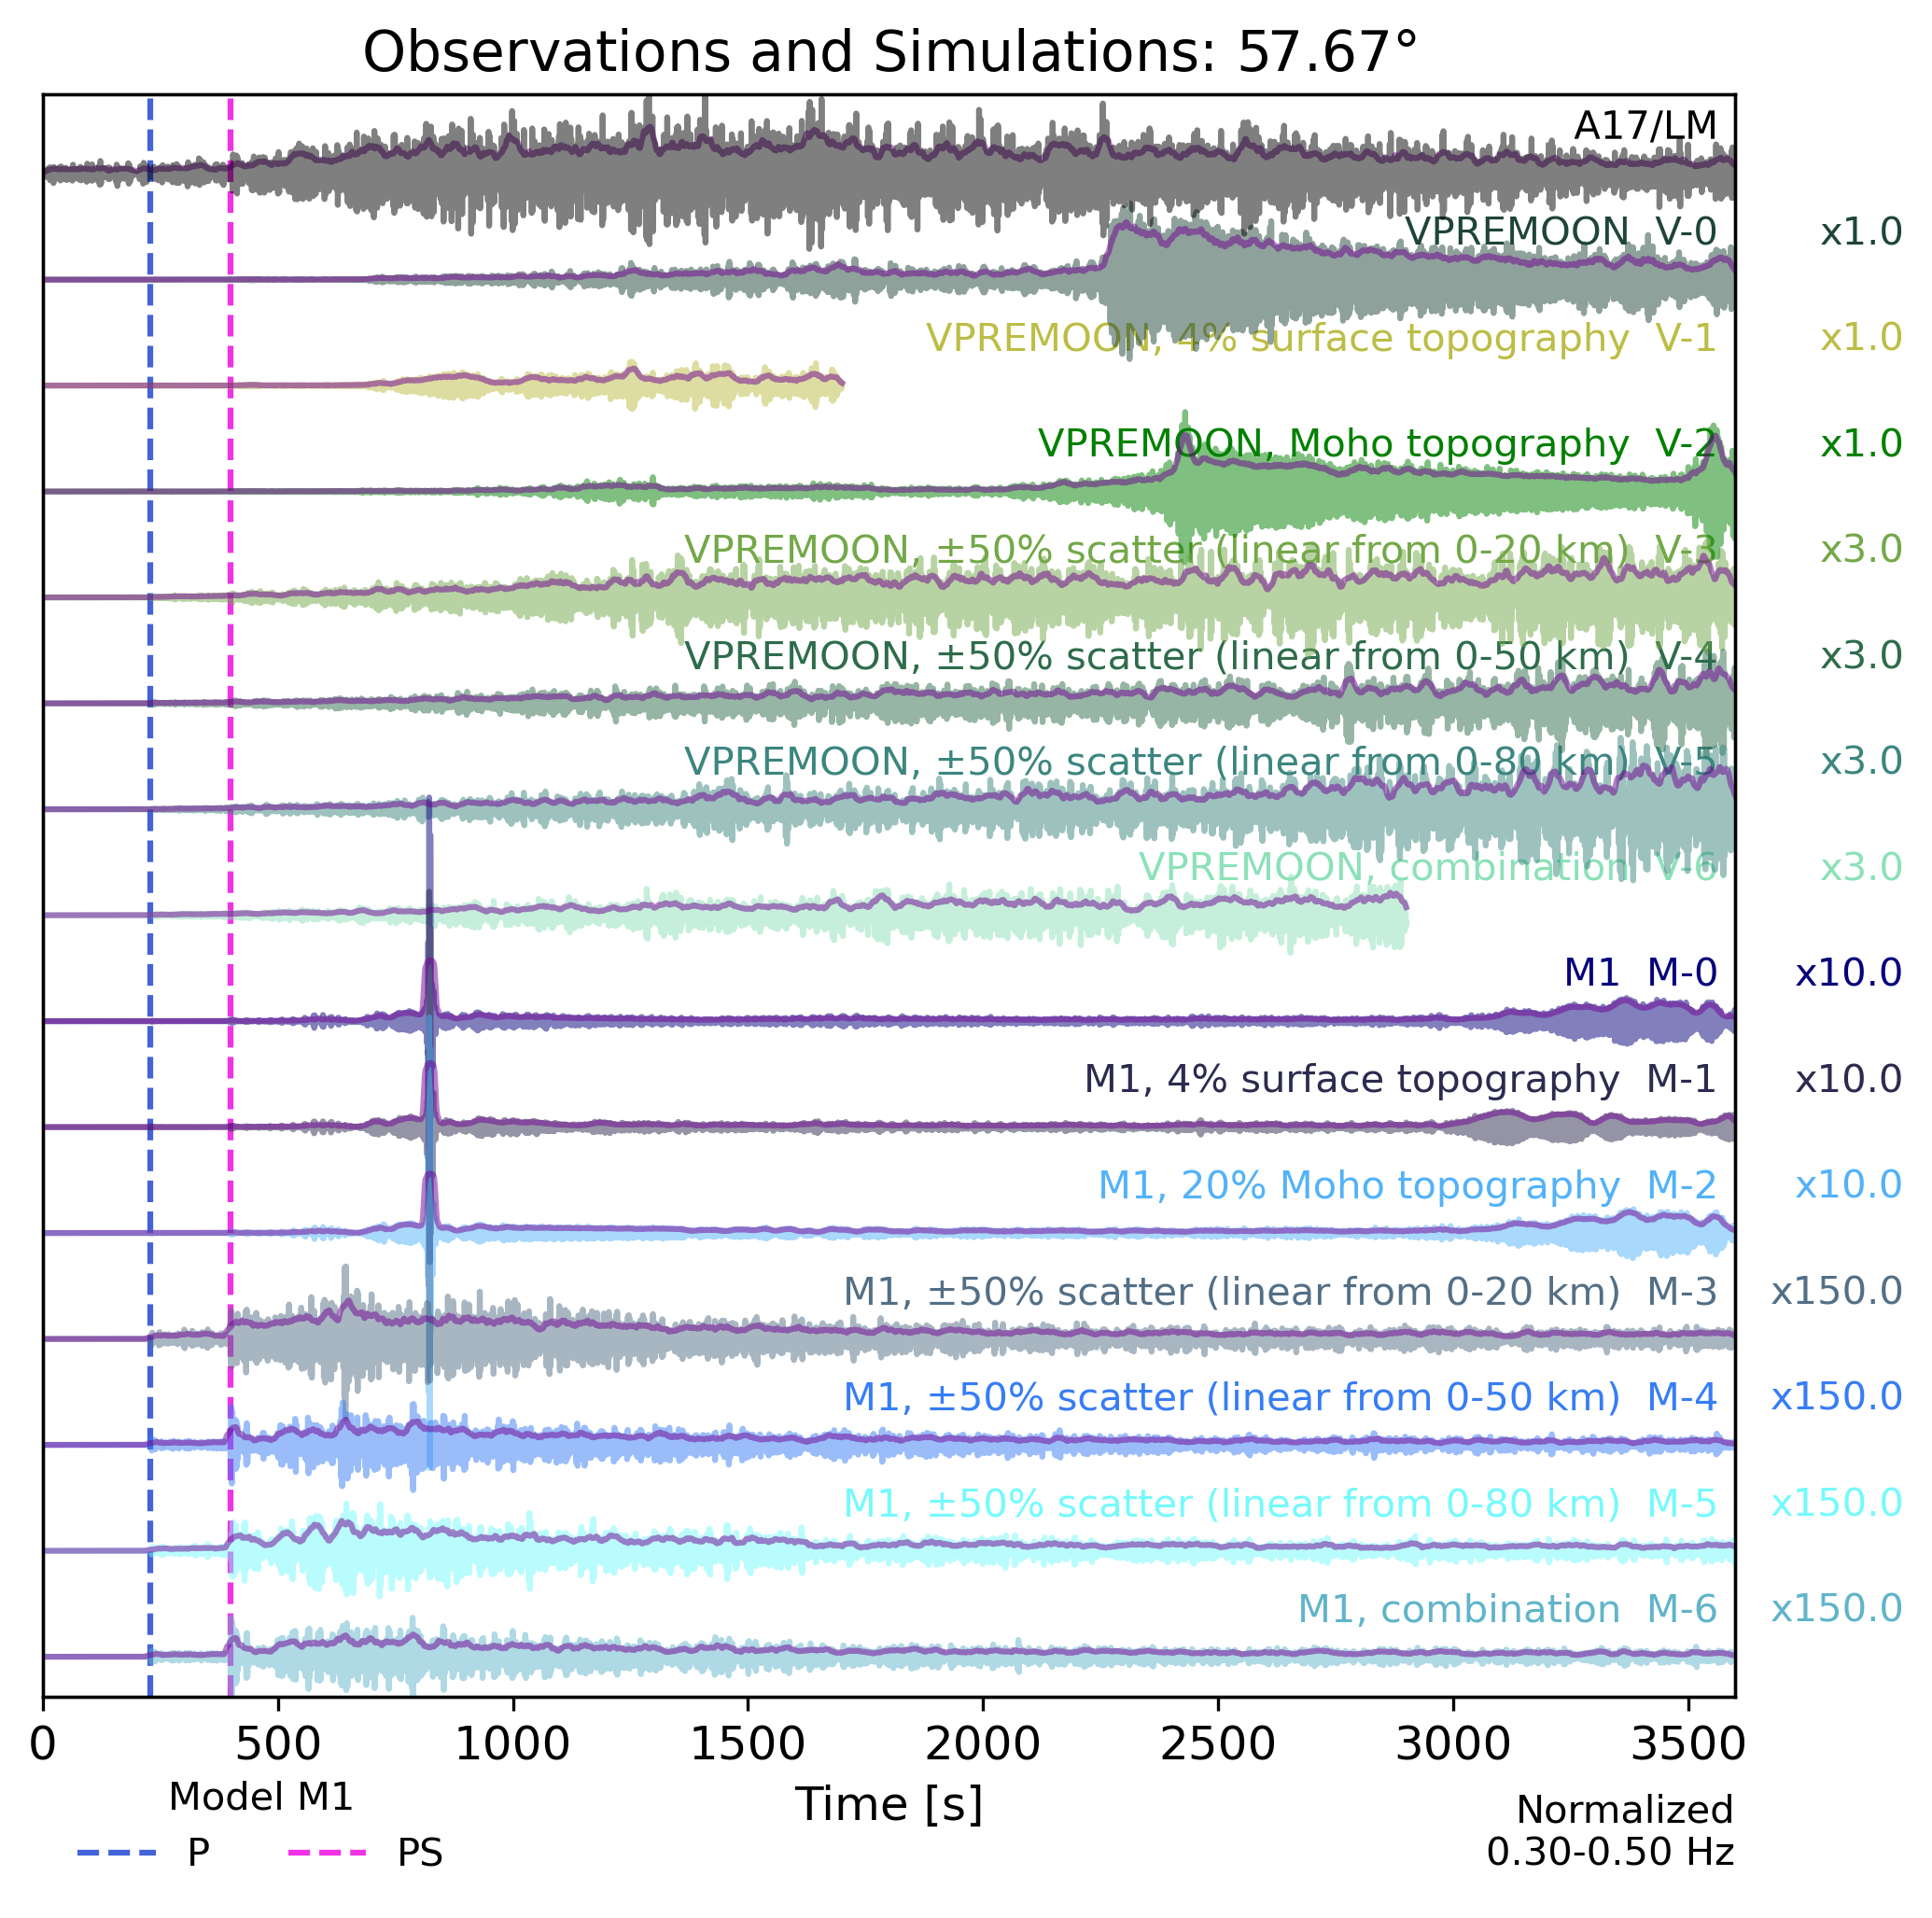

Calculated using model :  Model M1
Observations: smooth_periods=10, smooth_kernel_size=166 smoothing length=25.1 s
0 0.01796489743412697
plot envelope  1.0
Simulation: 120_VPREMOON_atten_explosion_2, smooth_periods=10, smooth_kernel_size=103 smoothing length=25.1 s
1 0.017655972839240783
plot envelope  1.0
Simulation: 128b_VPREMOON_atten_surface_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
2 0.01791456569394884
plot envelope  1.0
Simulation: 125_VPREMOON_atten_Moho_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
3 0.012053218824513559
plot envelope  1.0
Simulation: 127_VPREMOON_atten_linear20_2, smooth_periods=10, smooth_kernel_size=101 smoothing length=24.6 s
4 0.011683731069075696
plot envelope  1.0
Simulation: 126_VPREMOON_atten_linear50_2, smooth_periods=10, smooth_kernel_size=104 smoothing length=25.3 s
5 0.012226435792904316
plot envelope  1.0
Simulation: 124_VPREMOON_atten_linear80_2, smooth_periods=10, smooth_kernel_size=104 smoothin

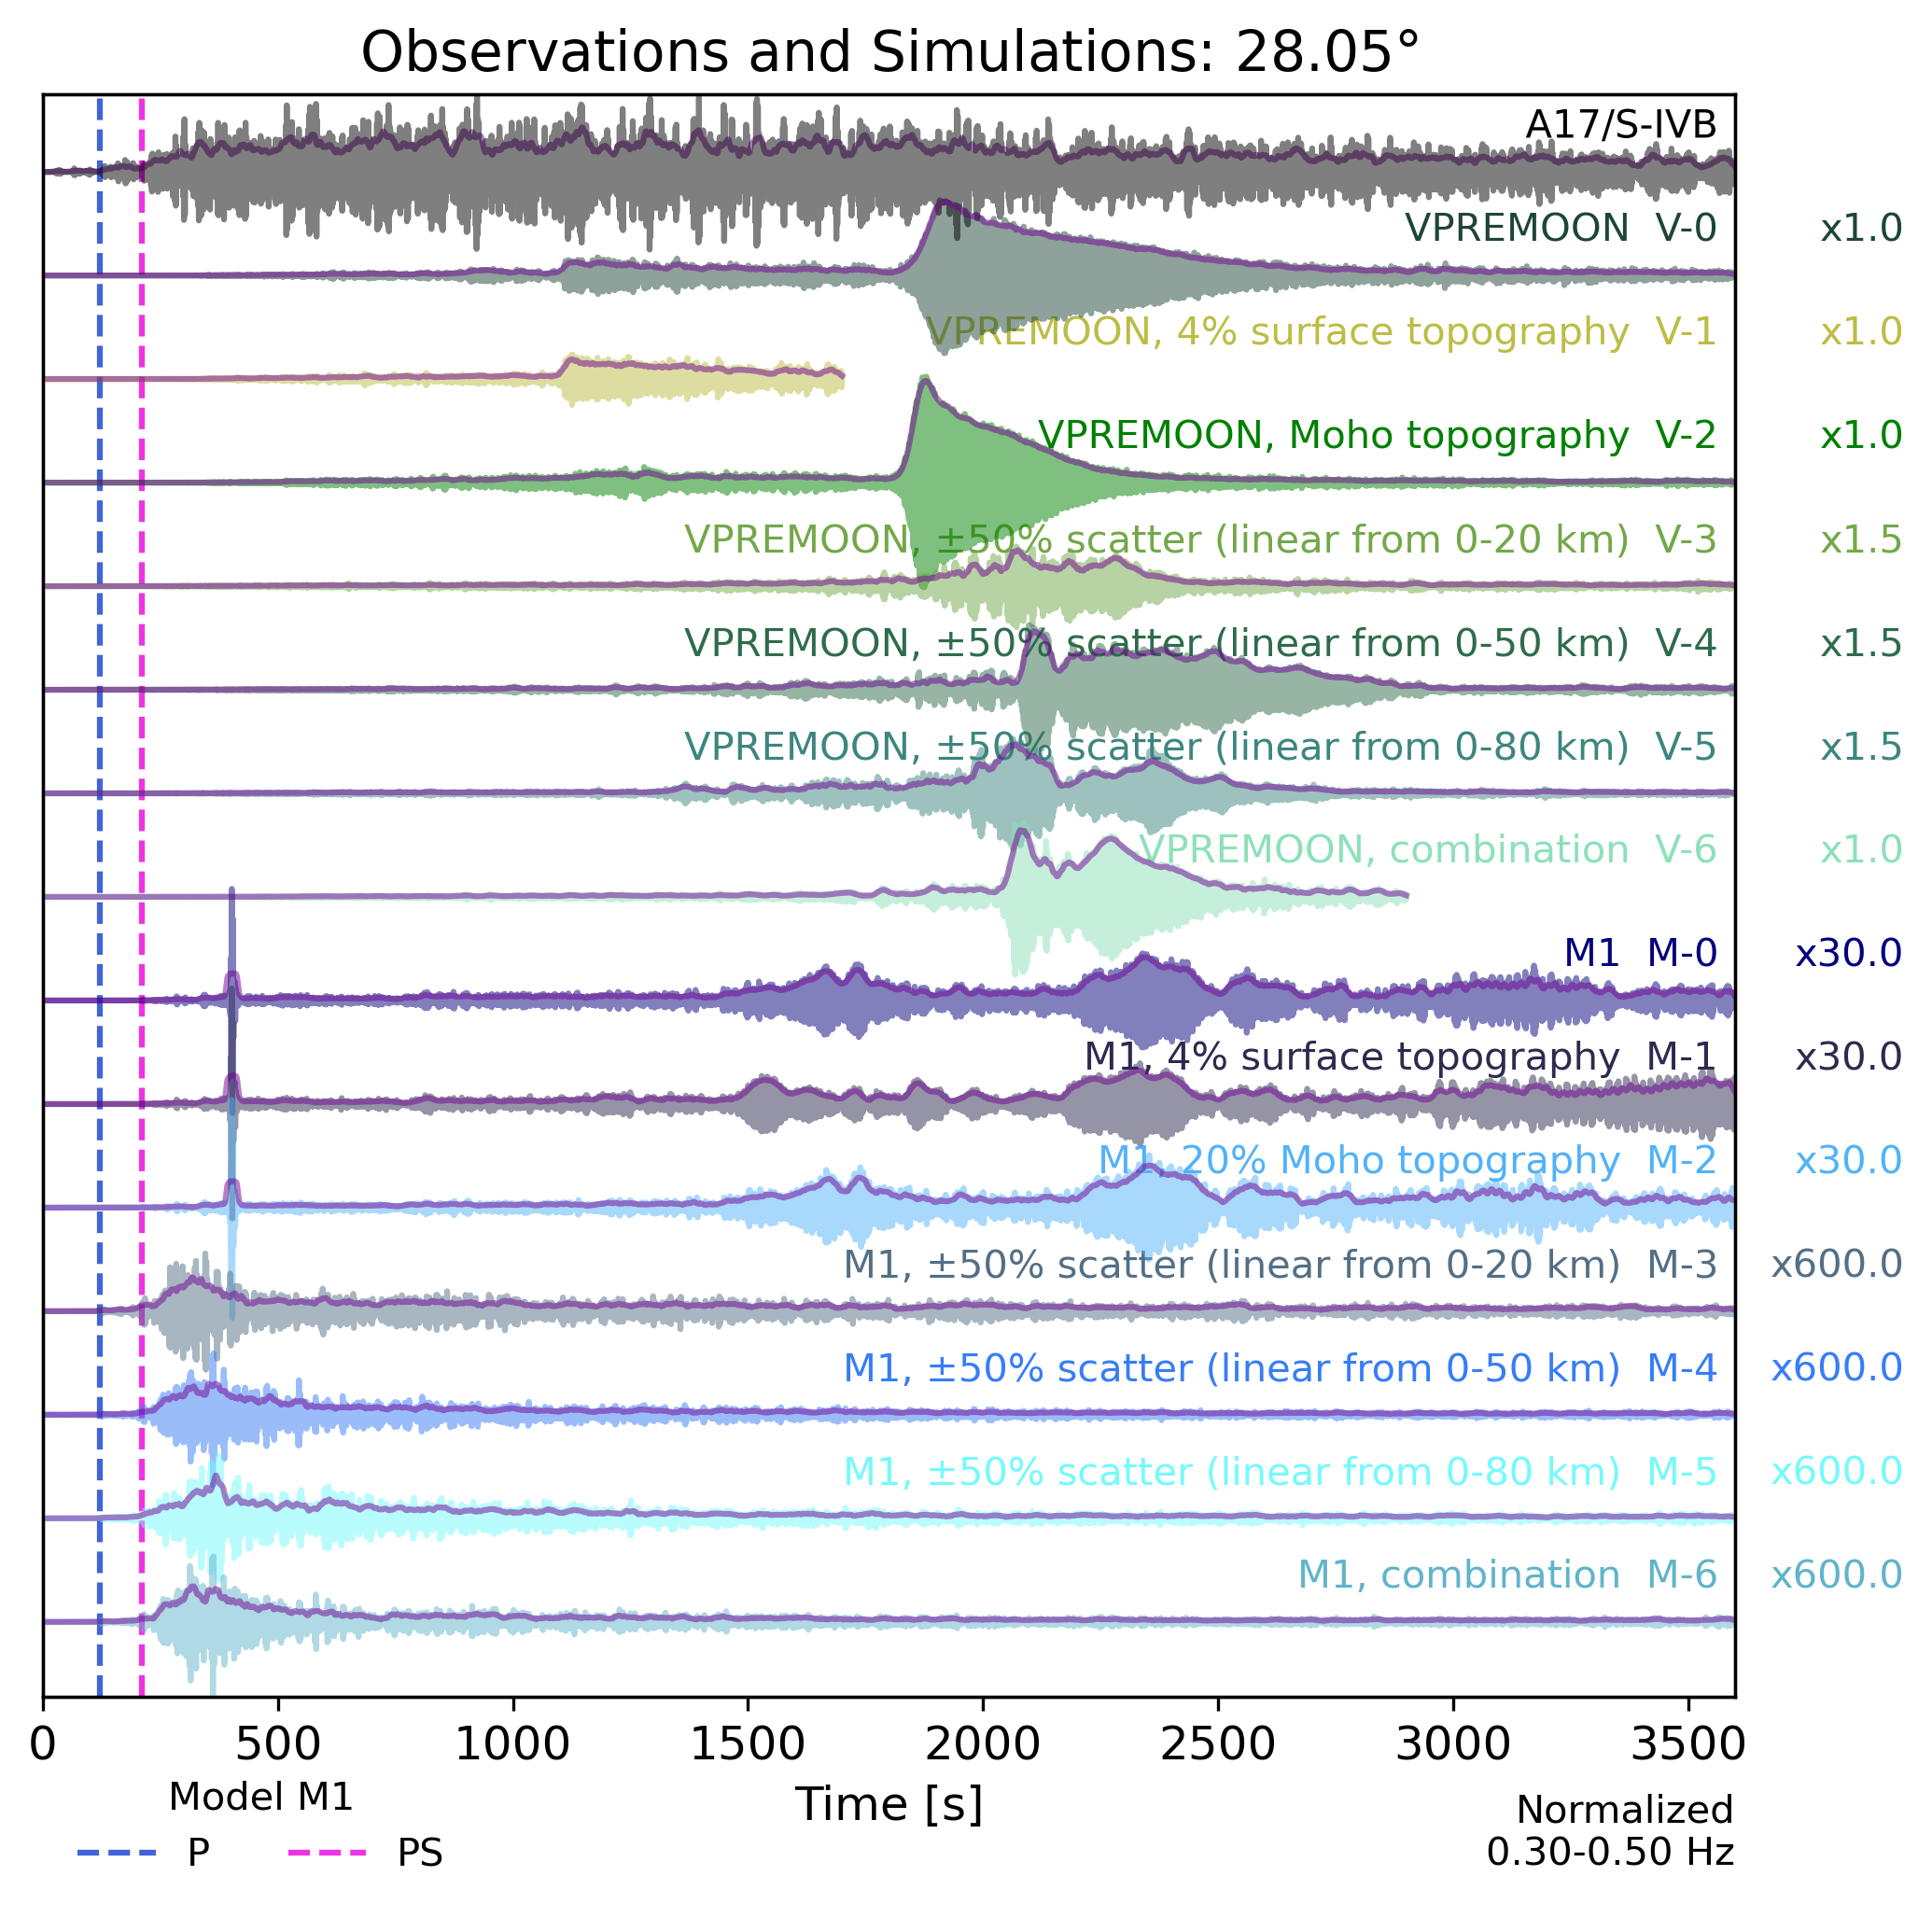

Calculated using model :  Model M1
Observations: smooth_periods=10, smooth_kernel_size=166 smoothing length=25.1 s
0 0.11776398900271925
plot envelope  1.0
Simulation: 120_VPREMOON_atten_explosion_2, smooth_periods=10, smooth_kernel_size=103 smoothing length=25.1 s
1 0.1157894153354765
plot envelope  1.0
Simulation: 128b_VPREMOON_atten_surface_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
2 0.12195097038926414
plot envelope  1.0
Simulation: 125_VPREMOON_atten_Moho_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
3 0.04764447642503787
plot envelope  1.0
Simulation: 127_VPREMOON_atten_linear20_2, smooth_periods=10, smooth_kernel_size=101 smoothing length=24.6 s
4 0.04679239159299174
plot envelope  1.0
Simulation: 126_VPREMOON_atten_linear50_2, smooth_periods=10, smooth_kernel_size=104 smoothing length=25.3 s
5 0.04704313879370786
plot envelope  1.0
Simulation: 124_VPREMOON_atten_linear80_2, smooth_periods=10, smooth_kernel_size=104 smoothing len

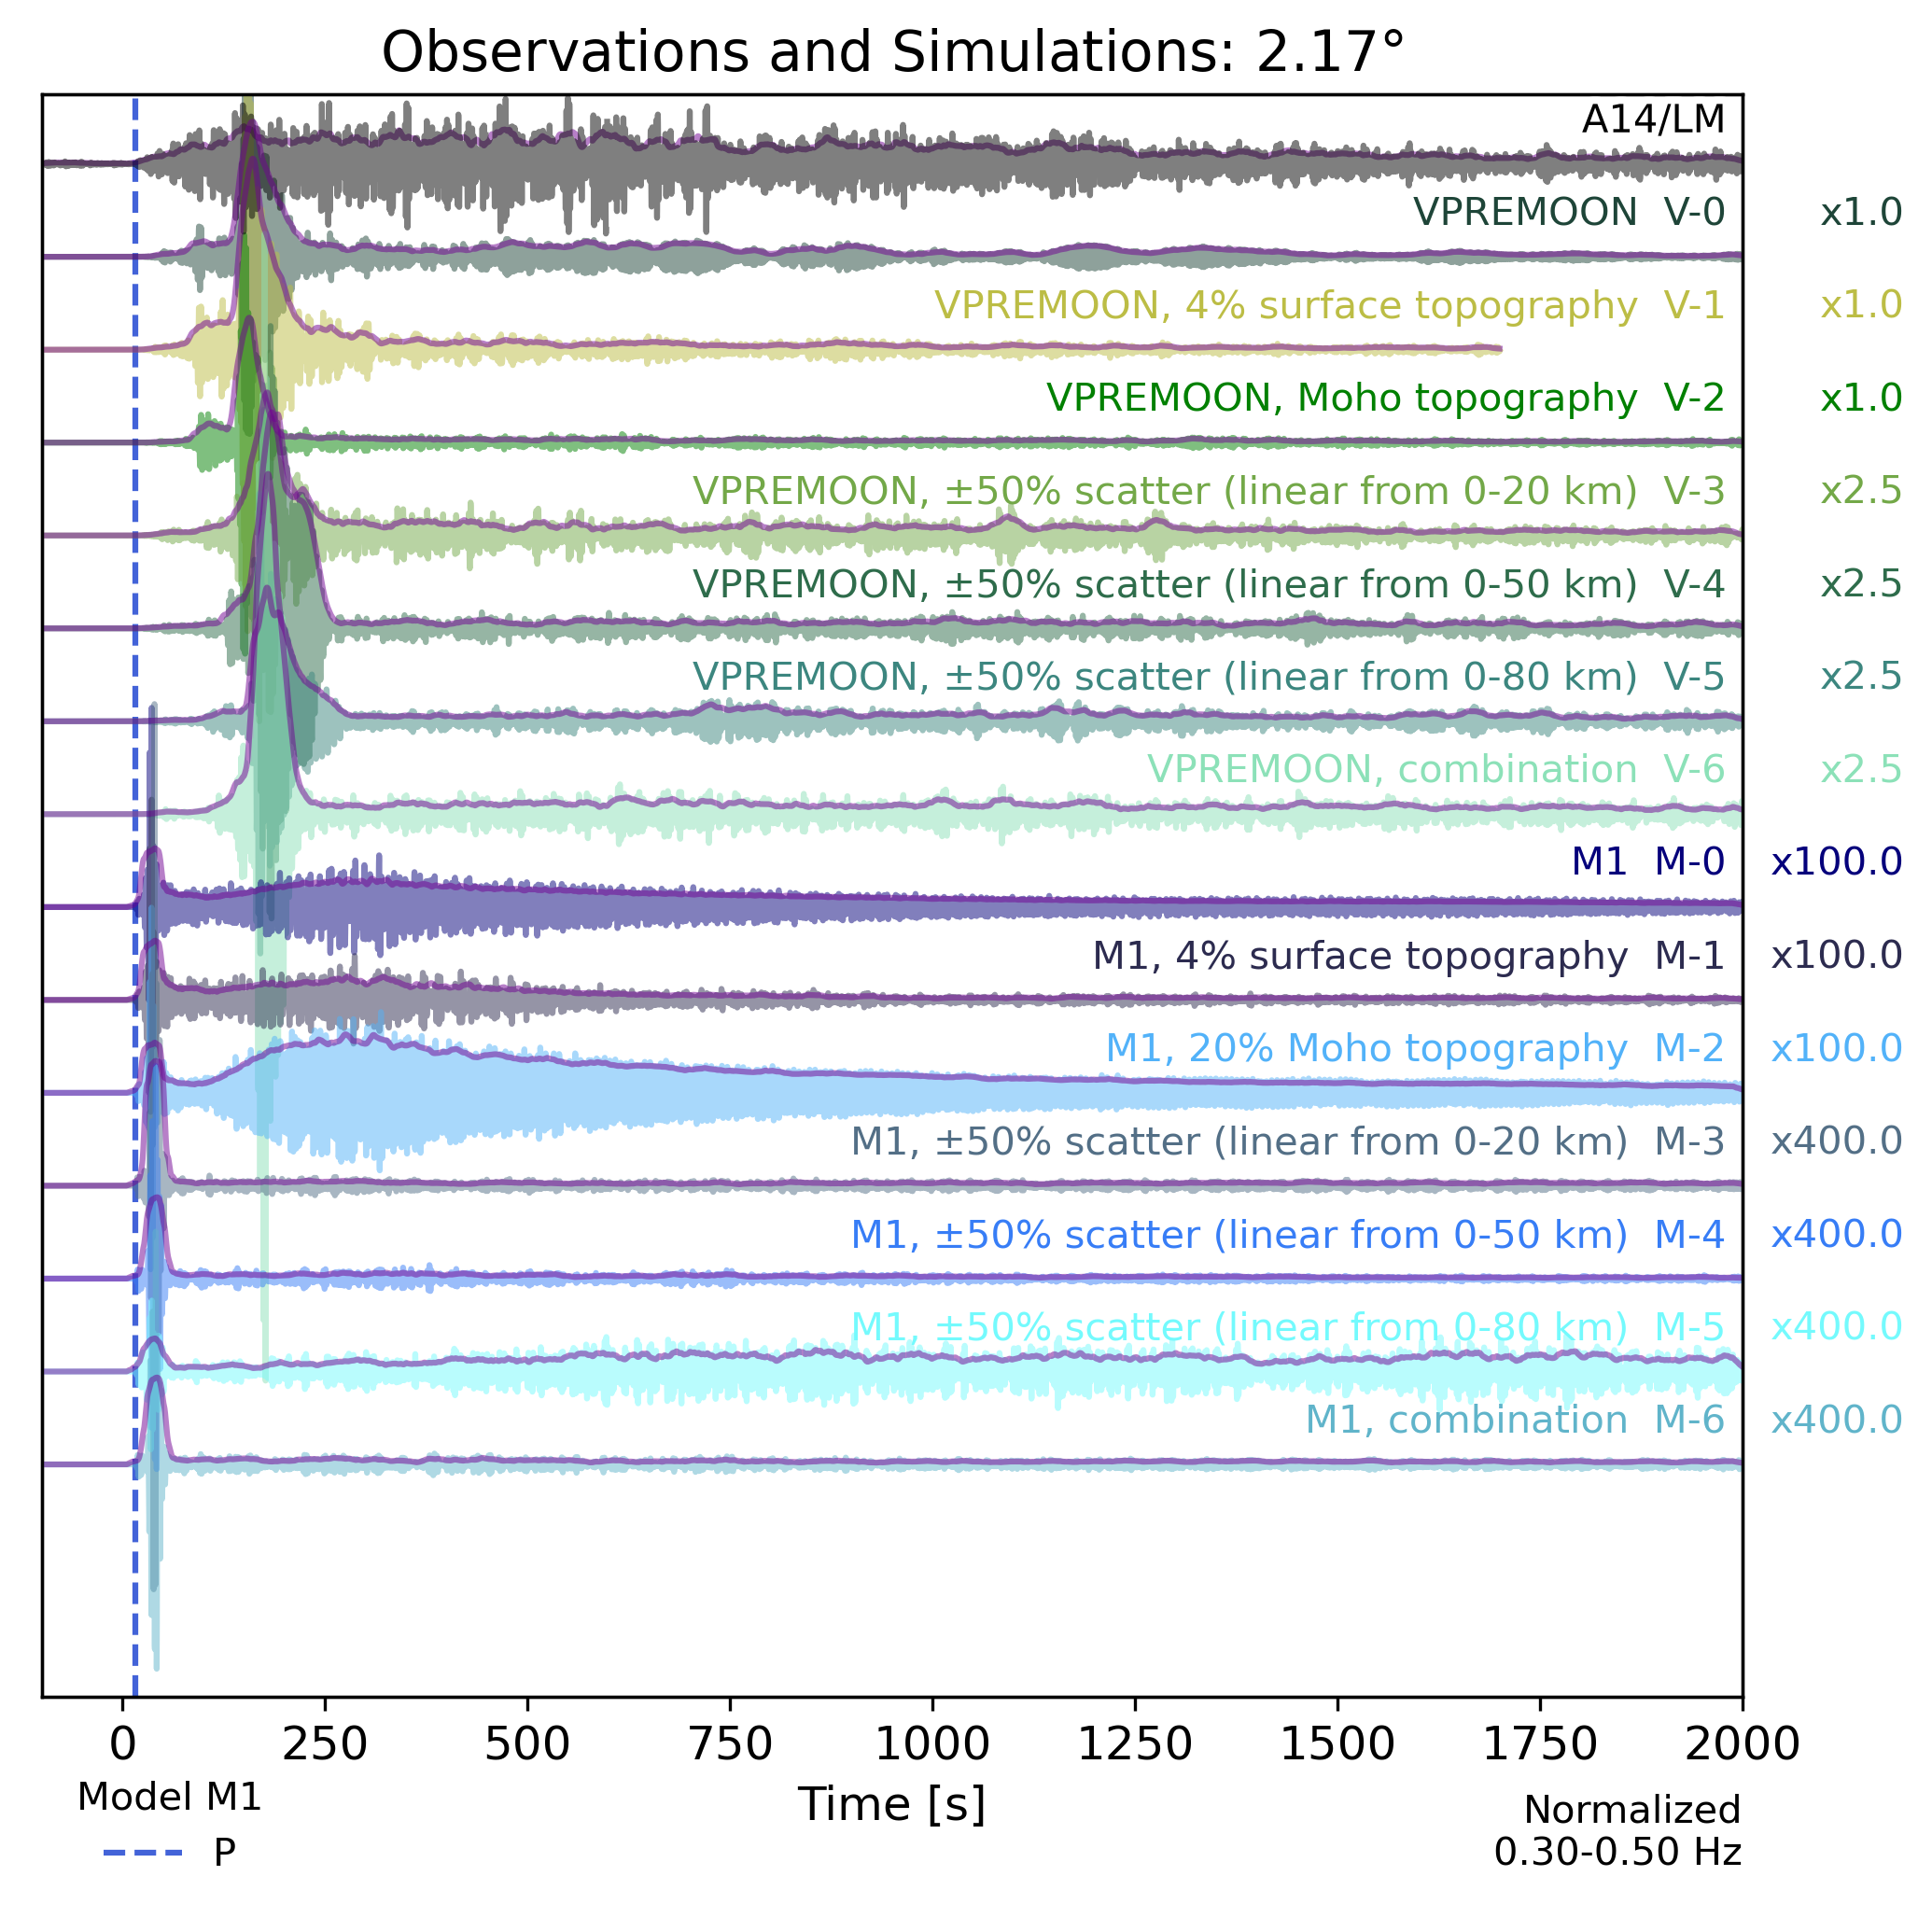

14 Trace(s) in Stream:
LM.LM14S14..Z | 1969-12-31T23:58:20.046640Z - 1970-01-01T00:33:20.000080Z | 4.1 Hz, 8630 samples
LM.LM14S14..Z | 1969-12-31T23:58:20.077046Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 7282 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.992062Z - 1970-01-01T00:33:19.936622Z | 4.1 Hz, 8509 samples
LM.LM14S14..Z | 1969-12-31T23:58:20.032860Z - 1970-01-01T00:33:20.118240Z | 4.0 Hz, 8479 samples
LM.LM14S14..Z | 1969-12-31T23:58:20.098910Z - 1970-01-01T00:33:20.110430Z | 4.1 Hz, 8673 samples
LM.LM14S14..Z | 1969-12-31T23:58:20.073200Z - 1970-01-01T00:33:20.013680Z | 4.1 Hz, 8713 samples
LM.LM14S14..Z | 1969-12-31T23:58:20.077046Z - 1970-01-01T00:33:19.980714Z | 4.0 Hz, 8495 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:33:20.002750Z | 4.1 Hz, 8512 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:33:20.002750Z | 4.1 Hz, 8512 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.885680Z - 1970-01-01T00:33:20.107680Z | 4.1 Hz, 8551 samples
LM.LM14

In [19]:
# Figure 9, 10 and 11 - Compare simulations with observations

run_list = [
'120_VPREMOON_atten_explosion_2', # VPREMOON
'128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
'125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
'127_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
'126_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
'124_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
'152_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

'141_ISSI_atten_explosion_2', # M1
'148_ISSI_atten_surface_2', # M1, 4% surface topography
'147_ISSI_atten_Moho_2', # M1, 20% Moho topography
'146_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
'145_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
'140_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
'150_ISSI_atten_combi_50_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
]

freqmin=0.3
freqmax=0.5

#2, 5, 25, 34, 57

scale_list = [
1.5,   # observation
1.5,   # '120_VPREMOON_atten_explosion_2', # VPREMOON
0.45,   # '128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
1.5,   # '125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
1.1,   # '127_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
1.,   # '126_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
1.35,   # '124_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
0.73,   # '152_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

4.55,   # '141_ISSI_atten_explosion_2', # M1
4.79,   # '148_ISSI_atten_surface_2', # M1, 4% surface topography
4.44,   # '147_ISSI_atten_Moho_2', # M1, 20% Moho topography
1.499,   # '146_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
0.8546,   # '145_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
0.894,   # '140_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
0.7645,   # '150_ISSI_atten_combi_50_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
             ] 

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[57],
                   inv=inv,
                    model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=0, endsecond=3600,channel='Z',
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"], 
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope_one_color=True,plot_derivative=False,
                              annotate_relative=True,
                              save_fig=True,figsize=(7,7 )
                             )


scale_list = [
1.5,   # observation
1.5,   # '120_VPREMOON_atten_explosion_2', # VPREMOON
0.5,   # '128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
2.0453,   # '125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
0.7895,   # '127_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
1.2500,   # '126_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
1.0714,   # '124_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
1.5000,   # '152_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

2.1739,   # '141_ISSI_atten_explosion_2', # M1
2.2305,   # '148_ISSI_atten_surface_2', # M1, 4% surface topography
2.1277,   # '147_ISSI_atten_Moho_2', # M1, 20% Moho topography
1.1299,   # '146_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
1.3571,   # '145_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
1.2124,   # '140_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
1.4551,   # '150_ISSI_atten_combi_50_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
             ] 

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[28],
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=0, endsecond=3600,channel='Z',
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"], 
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,plot_derivative=False,
                                           annotate_relative=True,
                           save_fig=True,figsize=(7,7 )
                             )

scale_list = [
1.5,   # observation
4,   # '120_VPREMOON_atten_explosion_2', # VPREMOON
6.0606,   # '128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
4.5455,   # '125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
4,   # '127_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
6.5104,   # '126_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
5,   # '124_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
12.5000,   # '152_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

4.4106,   # '141_ISSI_atten_explosion_2', # M1
4.3668,   # '148_ISSI_atten_surface_2', # M1, 4% surface topography
3.9880,   # '147_ISSI_atten_Moho_2', # M1, 20% Moho topography
10.3710,   # '146_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
4.5834,   # '145_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
1.6761,   # '140_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
5.0125,   # '150_ISSI_atten_combi_50_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
             ] 

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[2],
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=-100, endsecond=2000,channel='Z',
    
                              normalize='relative', scale_list=scale_list, phase_list=["P"],
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,plot_derivative=False,
                              annotate_relative=True,
                              save_fig=True,figsize=(7,7 )
                             )












Calculated using model :  Model M1
Observations: smooth_periods=10, smooth_kernel_size=884 smoothing length=133.4 s
0 0.009675735484324216
plot envelope  1.0
Simulation: 120_VPREMOON_atten_explosion_2, smooth_periods=10, smooth_kernel_size=548 smoothing length=133.4 s
1 0.009771173818475146
plot envelope  1.0
Simulation: 128b_VPREMOON_atten_surface_2, smooth_periods=10, smooth_kernel_size=540 smoothing length=131.4 s
2 0.009645672043854258
plot envelope  1.0
Simulation: 125_VPREMOON_atten_Moho_2, smooth_periods=10, smooth_kernel_size=541 smoothing length=131.7 s
3 0.0009648056293098668
plot envelope  1.0
Simulation: 127_VPREMOON_atten_linear20_2, smooth_periods=10, smooth_kernel_size=539 smoothing length=131.2 s
4 0.0009679050278610808
plot envelope  1.0
Simulation: 126_VPREMOON_atten_linear50_2, smooth_periods=10, smooth_kernel_size=551 smoothing length=134.1 s
5 0.000967921073779241
plot envelope  1.0
Simulation: 124_VPREMOON_atten_linear80_2, smooth_periods=10, smooth_kernel_size=55

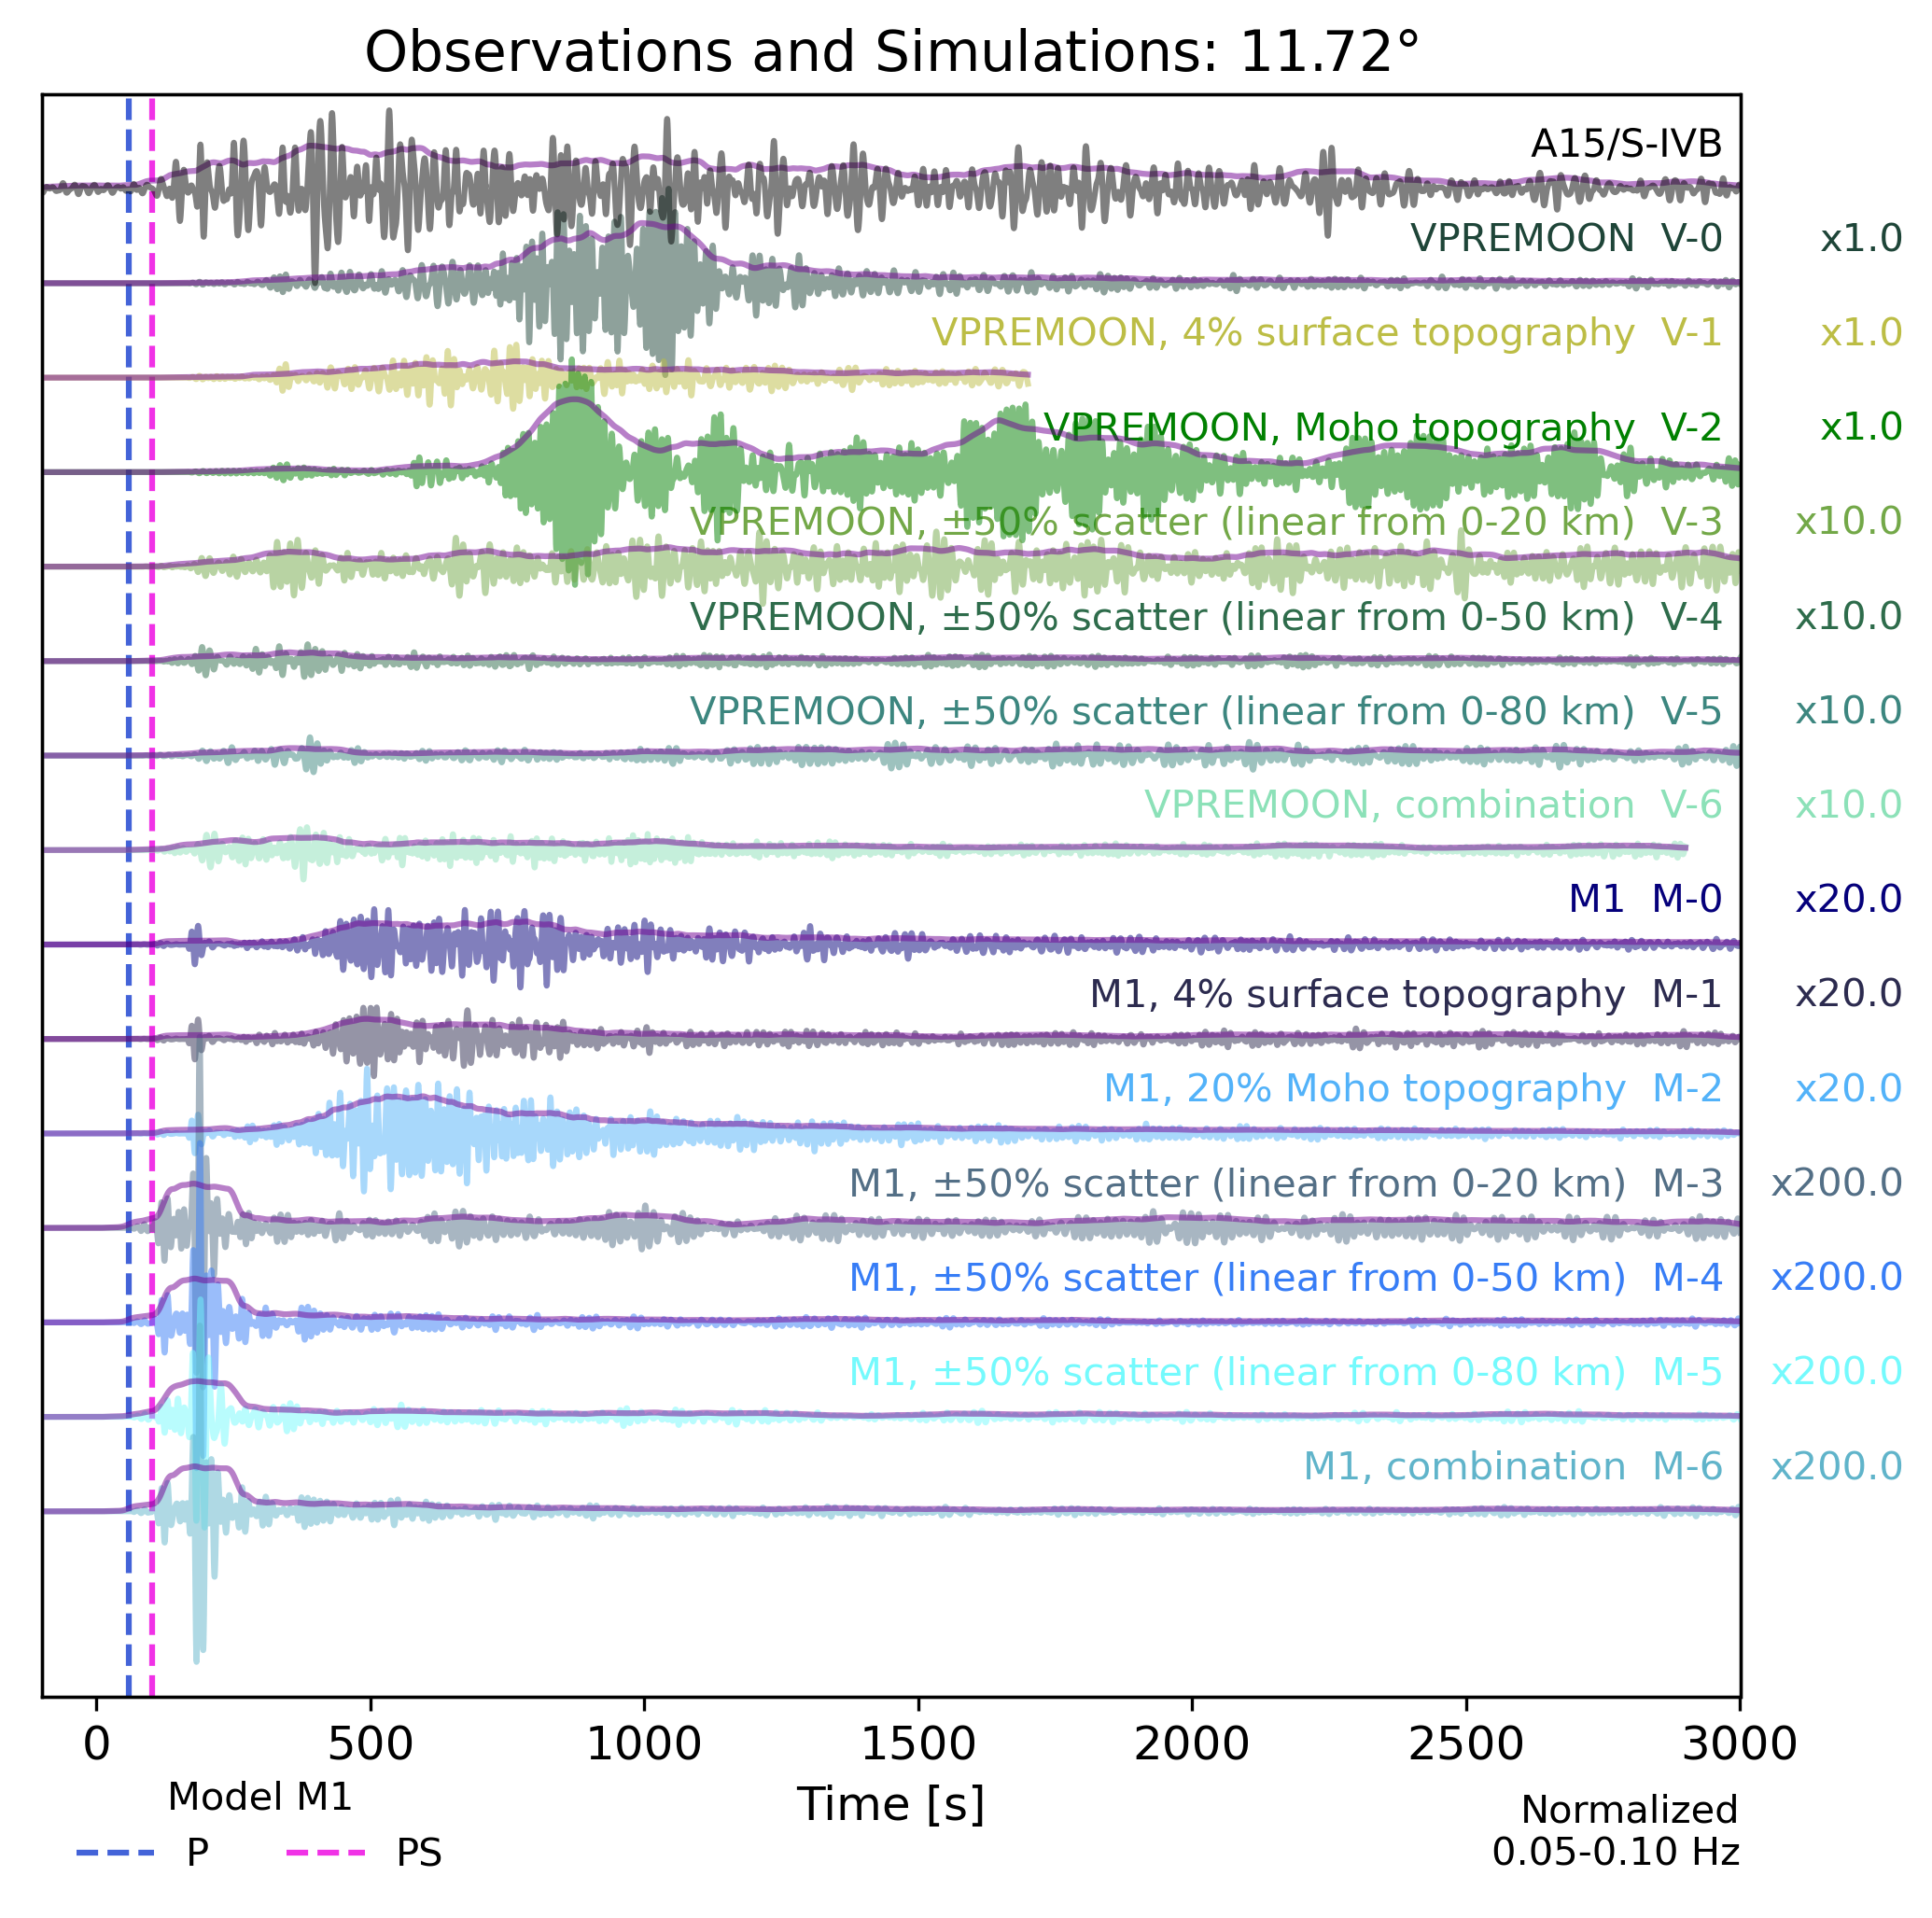

14 Trace(s) in Stream:
SB.SB15S12..Z | 1969-12-31T23:58:20.046640Z - 1970-01-01T00:49:59.966320Z | 4.1 Hz, 12739 samples
SB.SB15S12..Z | 1969-12-31T23:58:20.077046Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 7282 samples
SB.SB15S12..Z | 1969-12-31T23:58:19.992062Z - 1970-01-01T00:50:00.051262Z | 4.1 Hz, 12561 samples
SB.SB15S12..Z | 1969-12-31T23:58:20.032860Z - 1970-01-01T00:50:00.123510Z | 4.0 Hz, 12516 samples
SB.SB15S12..Z | 1969-12-31T23:58:20.098910Z - 1970-01-01T00:49:59.989070Z | 4.1 Hz, 12802 samples
SB.SB15S12..Z | 1969-12-31T23:58:20.073200Z - 1970-01-01T00:50:00.088640Z | 4.1 Hz, 12862 samples
SB.SB15S12..Z | 1969-12-31T23:58:20.077046Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 12136 samples
SB.SB15S12..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:50:00.080500Z | 4.1 Hz, 12565 samples
SB.SB15S12..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:50:00.080500Z | 4.1 Hz, 12565 samples
SB.SB15S12..Z | 1969-12-31T23:58:19.885680Z - 1970-01-01T00:50:00.108120Z | 4.1 Hz, 12622 sample

In [20]:
# Figure 12 - Comparing observations with simulations at lower frequencies

run_list = [
'120_VPREMOON_atten_explosion_2', # VPREMOON
'128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
'125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
'127_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
'126_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
'124_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
'152_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

'141_ISSI_atten_explosion_2', # M1
'148_ISSI_atten_surface_2', # M1, 4% surface topography
'147_ISSI_atten_Moho_2', # M1, 20% Moho topography
'146_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
'145_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
'140_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
'150_ISSI_atten_combi_50_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
]

freqmin=0.05
freqmax=0.1

scale_list = [
2,   # observation
2,   # '120_VPREMOON_atten_explosion_2', # VPREMOON
0.7,   # '128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
2.39,   # '125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
0.7910,   # '127_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
0.3569,   # '126_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
0.3879,   # '124_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
0.6238,   # '152_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

0.9103,   # '141_ISSI_atten_explosion_2', # M1
0.7889,   # '148_ISSI_atten_surface_2', # M1, 4% surface topography
1.3728,   # '147_ISSI_atten_Moho_2', # M1, 20% Moho topography
4.0480,   # '146_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
3.8005,   # '145_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
2.4886,   # '140_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
3.9345,   # '150_ISSI_atten_combi_50_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
             ] 

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=11.718510058287118,
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=-100, endsecond=3000,channel='Z',
    
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"],
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,plot_derivative=False,
                              annotate_relative=True,
                              save_fig=True,figsize=(7,7 )
                             )





45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.860380Z - 1970-01-01T01:00:09.810660Z | 4.0 Hz, 14615 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.860380Z - 1970-01-01T01:00:09.810660Z | 4.0 Hz, 14615 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872786994
L4 121.27245774557402
L8 242.54491549114798
L12 363.81737323672195
L16 485.08983098229595
L20 606.36228872787
L24 727.634746473444
L28 848.907204219018
L32 970.1796619645919
L36 1091.452119710166
L40 1212.72457745574
L44 1333.9970352013138
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.814408438036
event_depth=0
CURRENT RUN: 150_ISSI_atten_combi_50_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-02-15T22:14:36.358924Z.png


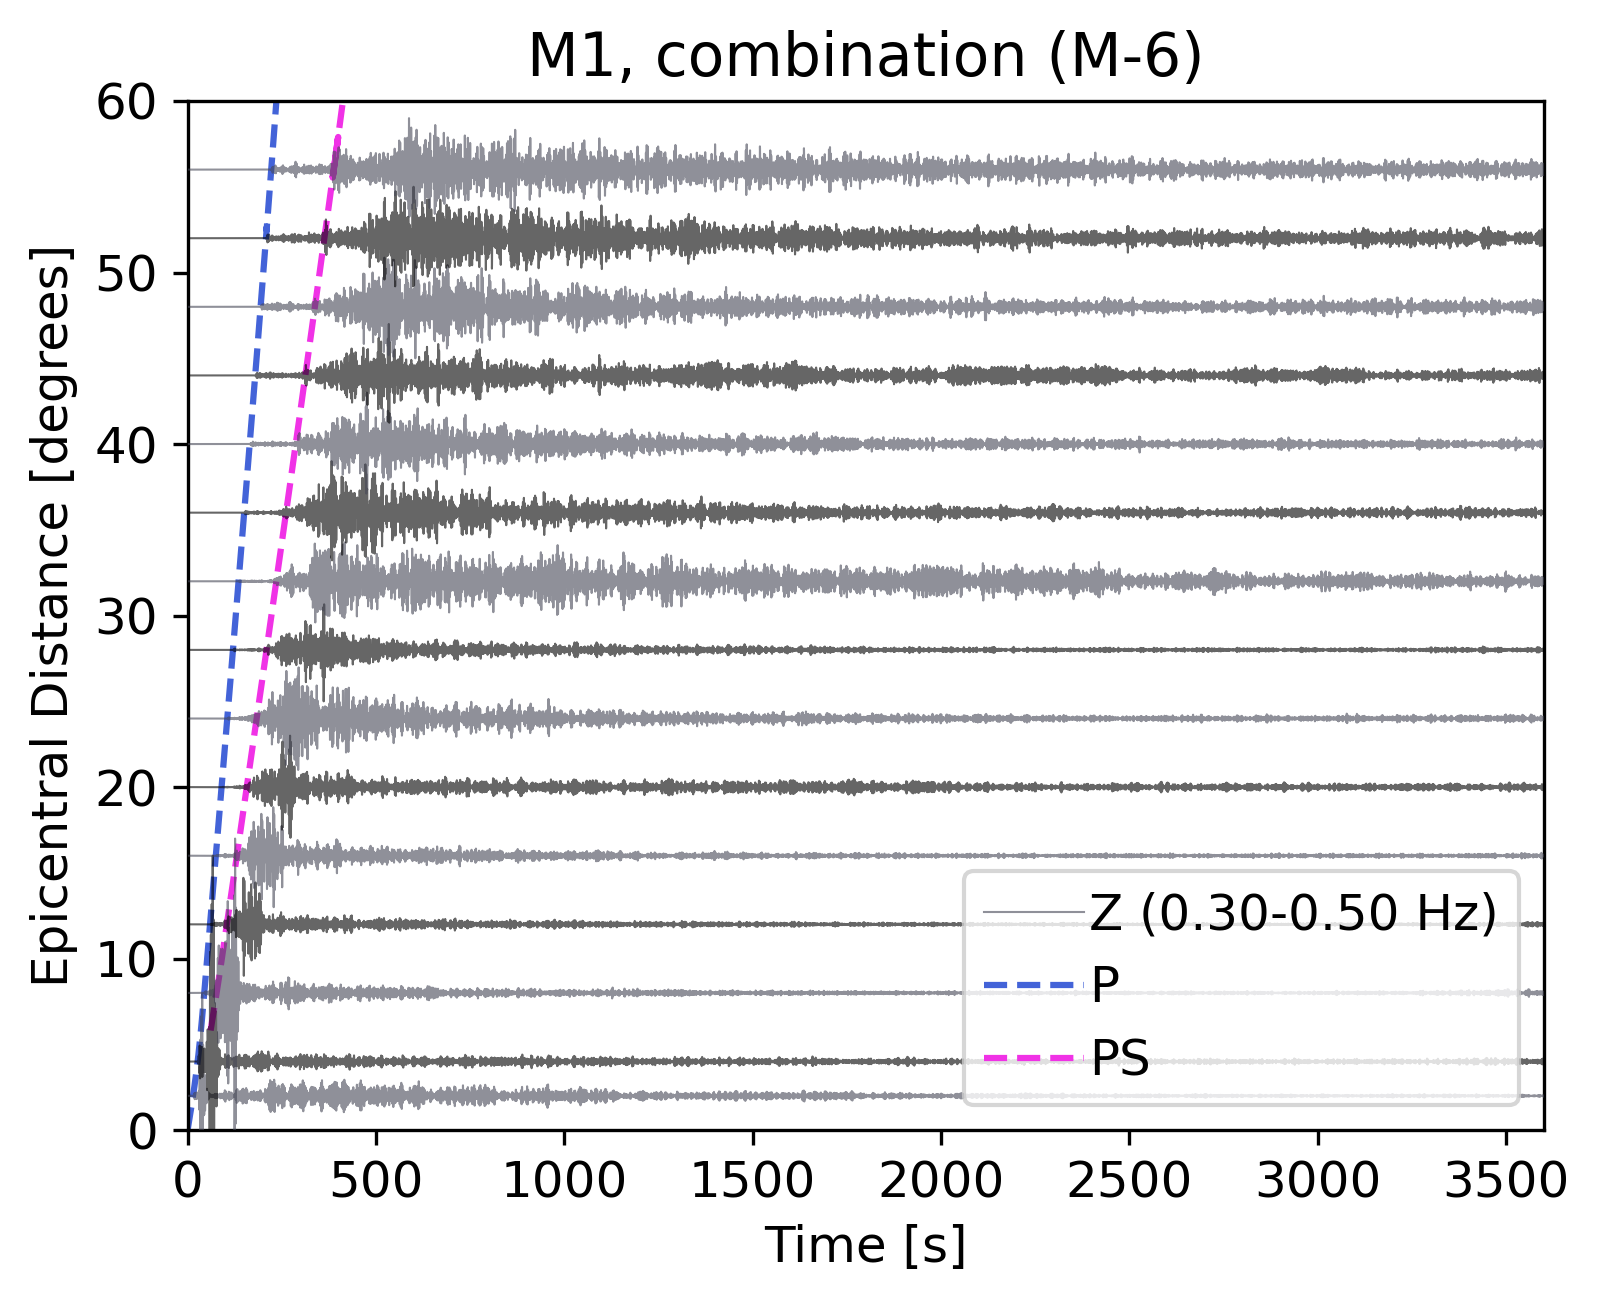

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L4..Z  | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L8..Z  | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L12..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L16..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L20..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L24..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L28..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L32..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L36..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L40..Z | 1970-01-01T00:00:00.10740

In [23]:
# Figure 13 - Simulations - 150_ISSI_atten_combi_50_2

############################################################################
# specify a run name
run = '150_ISSI_atten_combi_50_2'
run_title = "ISSI M1, surface topography, 20% Moho topography, ±50% scatter linear from 0 to 20 km, surface explosion"
short_title = "M1, combination (M-6)"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        2,4,3,1,1,
        1,1,1,0.8,1,
        1,1,1,1,1
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872786994
L4 121.27245774557402
L8 242.54491549114798
L12 363.81737323672195
L16 485.08983098229595
L20 606.36228872787
L24 727.634746473444
L28 848.907204219018
L32 970.1796619645919
L36 1091.452119710166
L40 1212.72457745574
L44 1333.9970352013138
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.814408438036
event_depth=0
CURRENT RUN: 152_VPREMOON_atten_combi_50_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


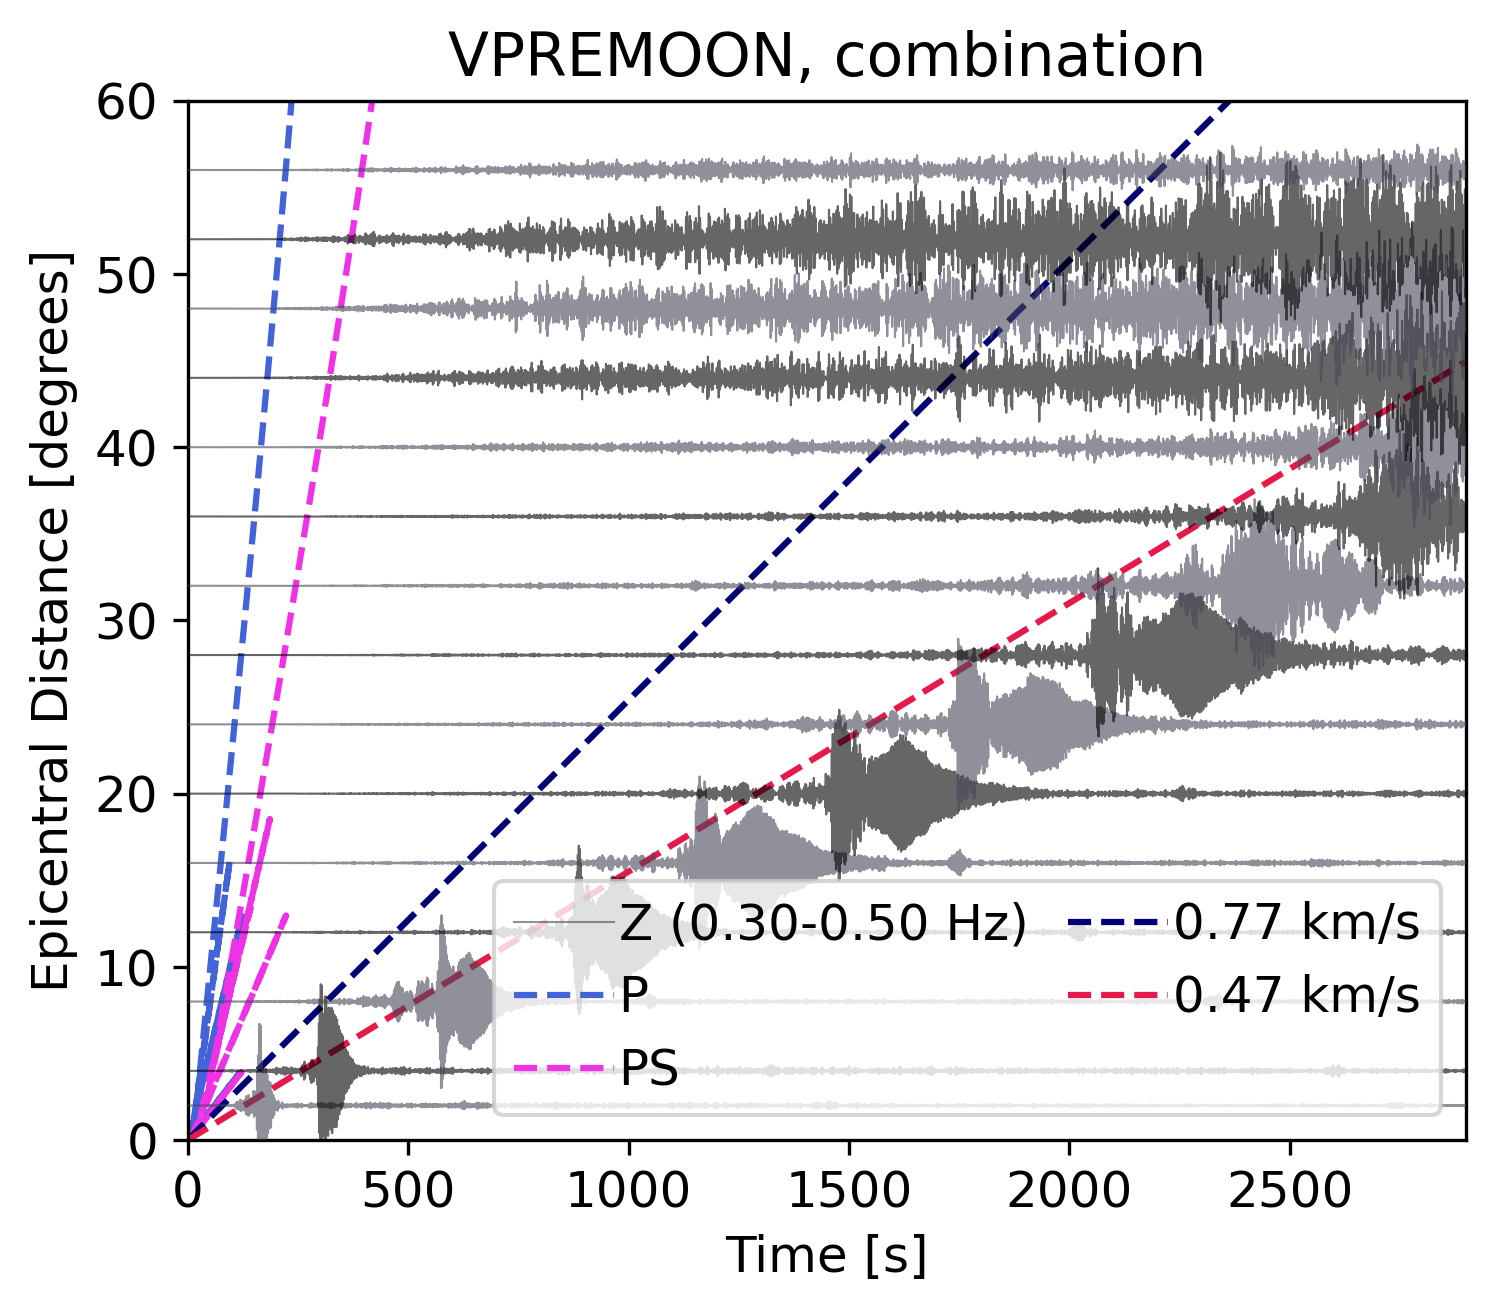

15 Trace(s) in Stream:
LO.L2..Z  | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L4..Z  | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L8..Z  | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L12..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L16..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L20..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L24..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L28..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L32..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L36..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:48:20.116016Z | 4.0 Hz, 11732 samples
LO.L40..Z | 1969-12-31T23:59:59.95473

In [44]:
# Not included in the paper - Simulations - 152_VPREMOON_atten_combi_50_2

# specify a run name
run = '152_VPREMOON_atten_combi_50_2'
run_title = "VPREMOON, 4% surface topopgraphy, 100% Moho topography, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = 'VPREMOON, combination'
# model for TauP
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)         
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,0.3
             ]




plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=5,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=2900,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=phase_list_VPREMOON_layered2, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',
                             )